# Introduction

Visualiser les données est une étape cruciale lorsqu'on analyse les données actuarielles. les actuaires sont d'abord passionnés par les chifre afin d'analyser les différents risques. Souvent les données sont en forme de tableau, il est important de prendre l'habitude de visualiser les données sous forme de graphique afin d'avoir un apperçu rapide. Pensez seulement au doonées abhérantes.

## Créer un graphique

Il y'a plusieurs manières de isualiser les données avec `R`. Dans ce cours, nous utilisons le _package_ `ggplot2`, ce dernier est très riche cohérent dans la création de graphique, il est aussi le plus utilisé dans la communauté scioentique, l'aide sur internet est aussi très abondante.

In [2]:
library(ggplot2)

pour faire les démonstarions, travaillerons dans les prochains exemples avec les données `mpg` qui sont aussi dans le package `ggplot2`.

In [3]:
head(mpg)

manufacturer model displ year cyl trans      drv cty hwy fl class  
1 audi         a4    1.8   1999 4   auto(l5)   f   18  29  p  compact
2 audi         a4    1.8   1999 4   manual(m5) f   21  29  p  compact
3 audi         a4    2.0   2008 4   manual(m6) f   20  31  p  compact
4 audi         a4    2.0   2008 4   auto(av)   f   21  30  p  compact
5 audi         a4    2.8   1999 6   auto(l5)   f   16  26  p  compact
6 audi         a4    2.8   1999 6   manual(m5) f   18  26  p  compact

Nous nous aintéréssons alors à la relation entre la taille du moteur **displ** et **hwy**, l'efficacité énergétique d'une voiture sur l'autoroute, en miles par gallon(mpg). Une voiture à faible rendement énergétique consomme plus de carburant que une voiture à haut rendement énergétique lorsqu'ils parcourent la même distance.

## geom

Chaque fonction geom dans ggplot2 prend un argument de mappage. Ceci définit comment les variables de votre ensemble de données sont mappées aux propriétés visuelles. L'argument de mappage est toujours associé à aes (), et les arguments x et y de aes () spécifient les variables à mapper avec les axes x et y. ggplot2 recherche la variable mappée dans l'argument de données, dans ce cas, mpg

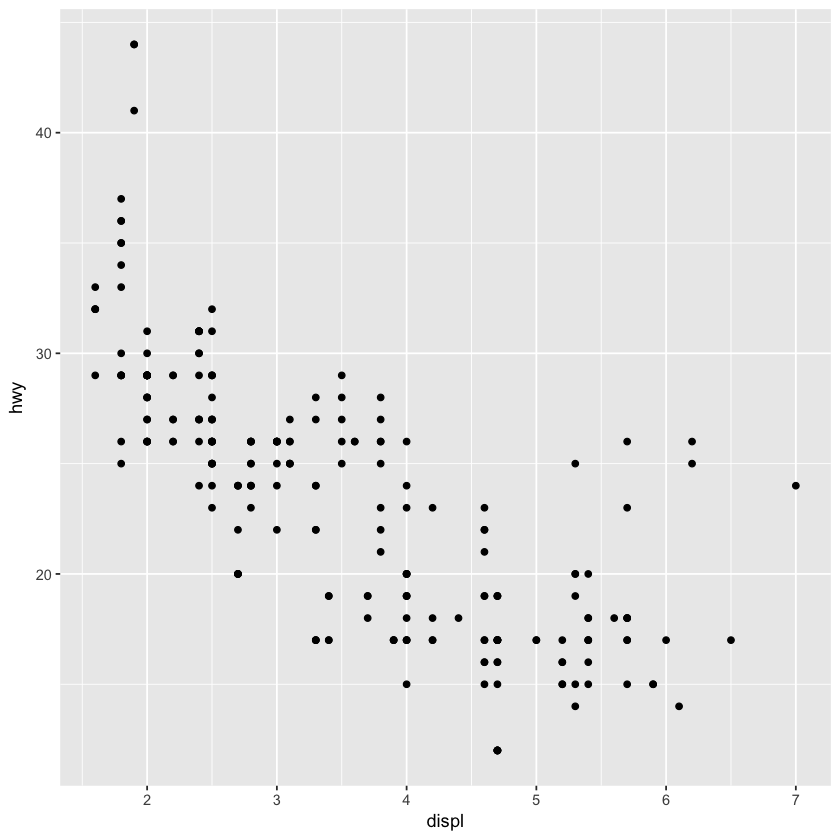

In [4]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy))

## aes

Dans le graphique précédent, on ne peut distinguer les catégories de voitures, on aimerait distinguer ces catégories dans le graphique. Pour ce faire, nous devons modifier "l'esthétique" (_aesthetic_) du graphique. On peut alors ajouter une troisième variable comme la classe, à un nuage de points bidimensionnel. L'esthétique comprend des choses comme la taille, la forme ou la couleur de vos points.

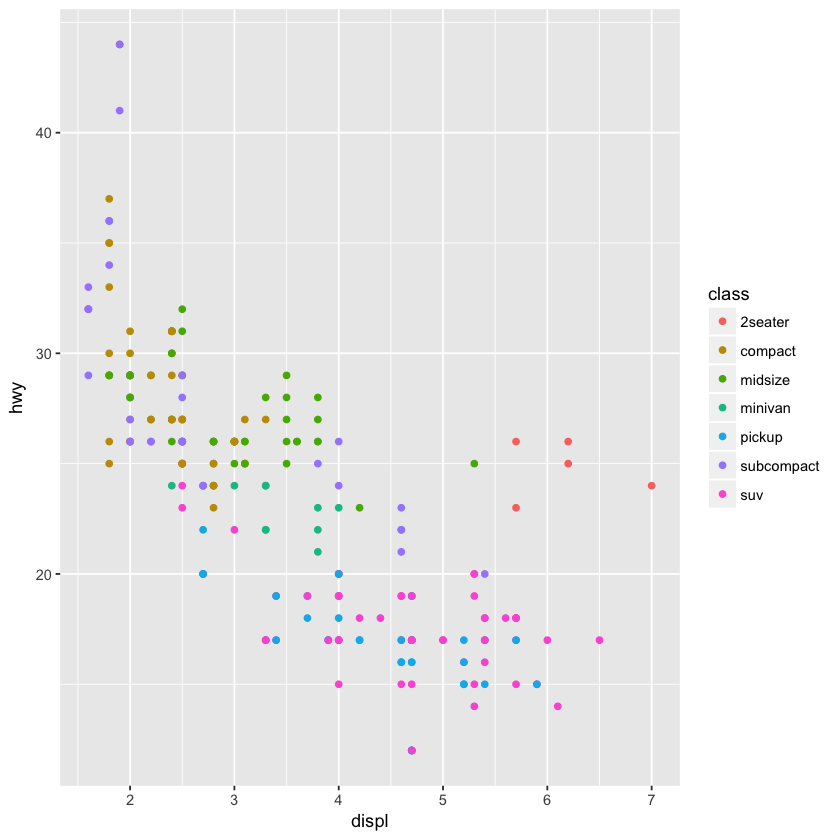

In [5]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, color = class))

Si on utilise l'argument `alpha`, on obitent alors;

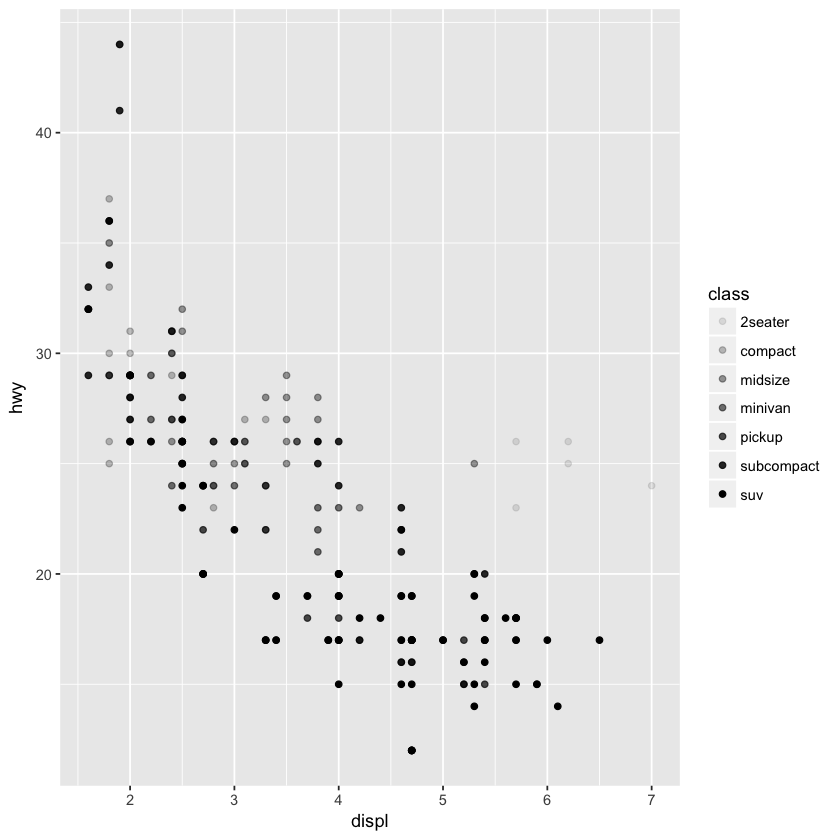

In [6]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

ou la variable `shape`

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

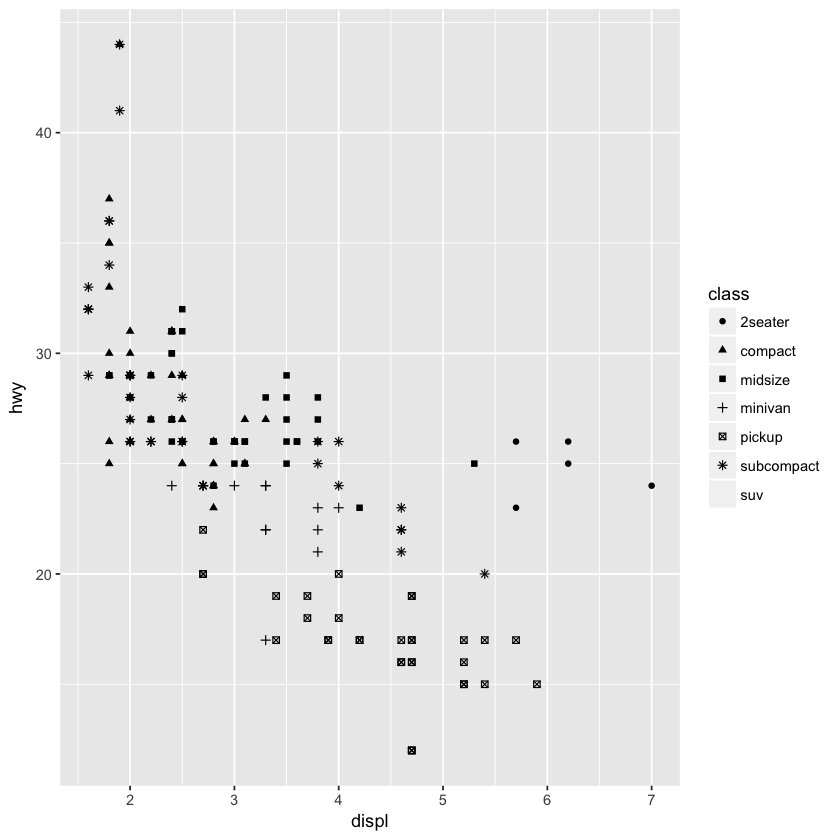

In [48]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy, shape = class))

on obtient un avertissemnt nous indiquons que l'argument shape contient seulement 6 catégories et que dans nos donnés nous en avons 7:

Une autre méthode, particulièrement utile pour les variables catégorielles, consiste à diviser le graphique en facettes, sous-placettes qui affichent chacune un sous-ensemble des données.

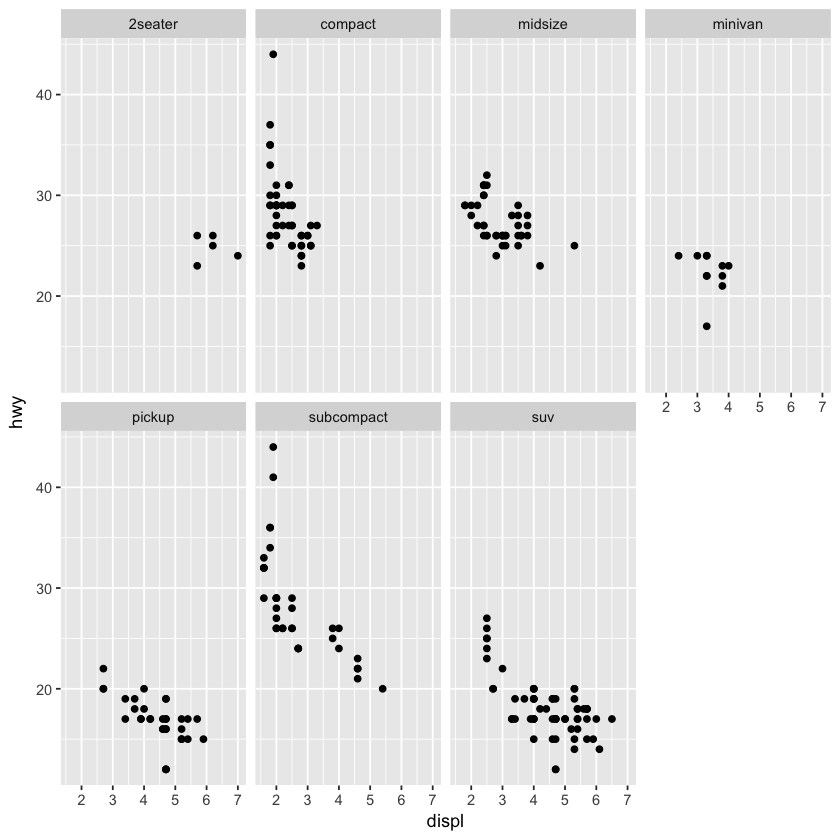

In [49]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy)) +
facet_wrap(~ class, nrow = 2)

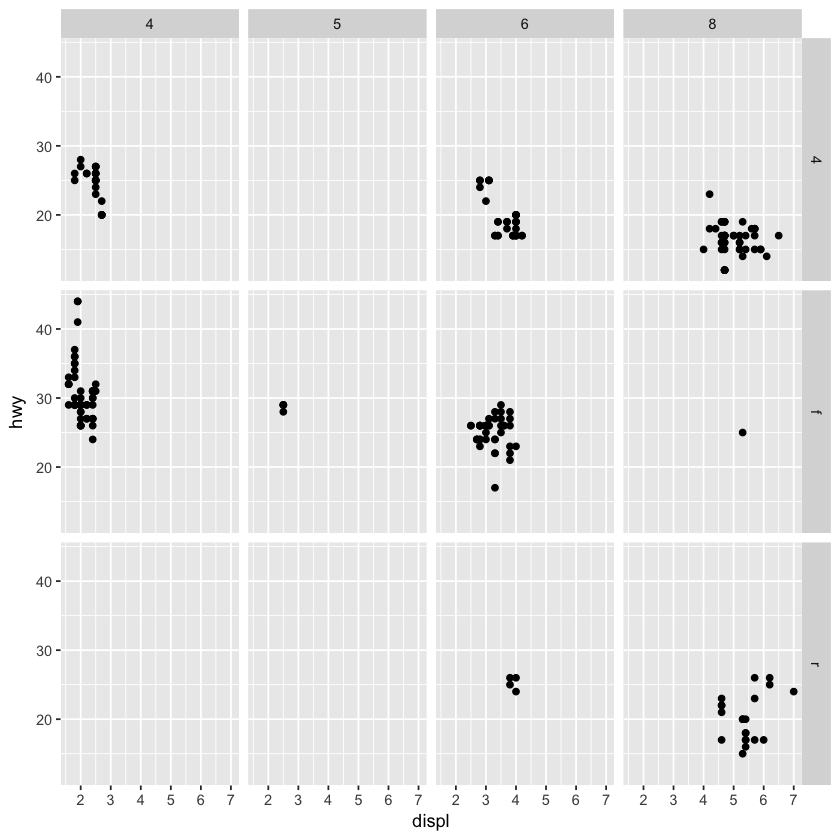

In [50]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy)) +
facet_grid(drv ~ cyl)

In [51]:
head(mpg)

manufacturer model displ year cyl trans      drv cty hwy fl class  
1 audi         a4    1.8   1999 4   auto(l5)   f   18  29  p  compact
2 audi         a4    1.8   1999 4   manual(m5) f   21  29  p  compact
3 audi         a4    2.0   2008 4   manual(m6) f   20  31  p  compact
4 audi         a4    2.0   2008 4   auto(av)   f   21  30  p  compact
5 audi         a4    2.8   1999 6   auto(l5)   f   16  26  p  compact
6 audi         a4    2.8   1999 6   manual(m5) f   18  26  p  compact

In [52]:
unique(mpg$drv)

[1] "f" "4" "r"

In [53]:
unique(mpg$cyl)

[1] 4 6 8 5

In [54]:
A<-ggplot(data = mpg) +
geom_smooth(mapping = aes(x = displ, y = hwy))
B<-ggplot(data = mpg) +
geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

In [55]:
# install.packages("ggpubr")

In [56]:
library(ggpubr)

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


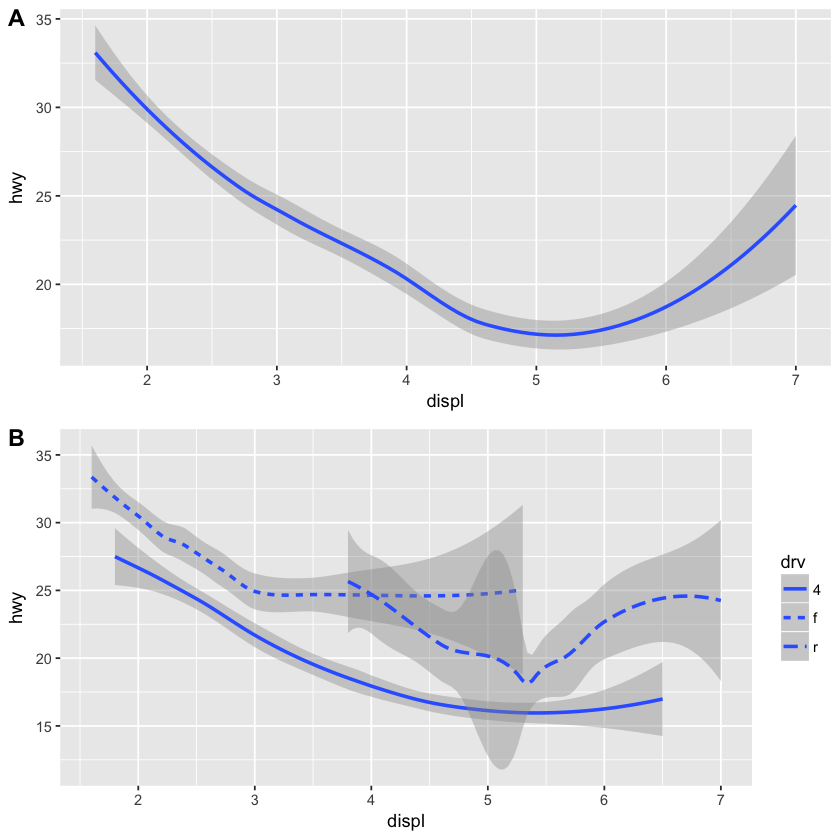

In [57]:
ggarrange(A, B, 
          labels = c("A", "B"),
          ncol = 1, nrow = 2)

`geom_smooth()` using method = 'loess'


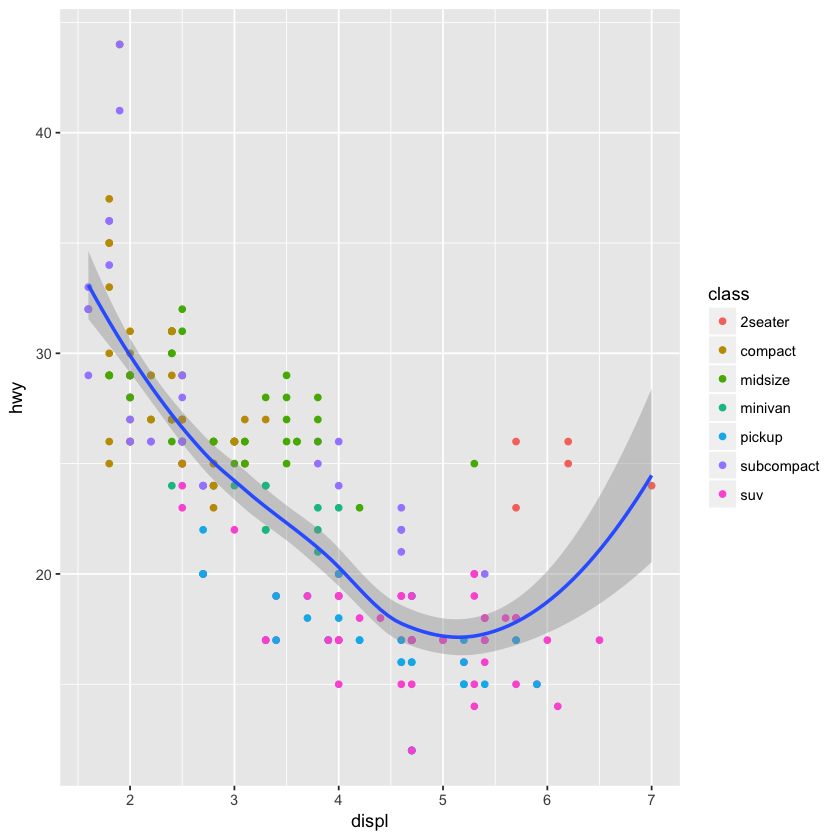

In [58]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
geom_point(mapping = aes(color = class)) +
geom_smooth()

regardons les données d'assurance que nous avons;

In [59]:
data<-read.csv("../données/donnes_demo.csv")

In [60]:
head(data)

name            province        company                   langue
1 Shane Robinson  Nova Scotia     May Ltd                   fr    
2 Courtney Nguyen Saskatchewan    Foley, Moore and Mitchell en    
3 Lori Washington Yukon Territory Robinson-Reyes            fr    
4 Sarah Castillo  Alberta         Wood, Brady and English   fr    
5 Jeffrey Garcia  Nunavut         Berger-Thompson           en    
6 Colleen Coleman Saskatchewan    Simmons-Smith             en    
  date_naissance agee age_permis numeropol
1 1944-10-20     72   24          1       
2 1985-12-09     31   24          5       
3 1970-01-27     47   28         13       
4 2000-08-23     16   16         16       
5 1969-10-25     47   20         22       
6 1984-10-16     32   23         28

In [61]:
library(data.table)

ageebreaks <- c(0,20,25,30,35,40,45,50,55,60,65,70,75,80,85,500)
ageelabels <- c("0-19","20-24","25-29","30-34",
               "35-39","40-44","45-49","50-54","55-59","60-64","65-69",
               "70-74","75-79","80-84","85+")

data<-setDT(data)[ , ageegroups := cut(agee, 
                                breaks = ageebreaks, 
                                right = FALSE, 
                                labels = ageelabels)]

In [62]:
head(data)

name            province        company                   langue
1 Shane Robinson  Nova Scotia     May Ltd                   fr    
2 Courtney Nguyen Saskatchewan    Foley, Moore and Mitchell en    
3 Lori Washington Yukon Territory Robinson-Reyes            fr    
4 Sarah Castillo  Alberta         Wood, Brady and English   fr    
5 Jeffrey Garcia  Nunavut         Berger-Thompson           en    
6 Colleen Coleman Saskatchewan    Simmons-Smith             en    
  date_naissance agee age_permis numeropol ageegroups
1 1944-10-20     72   24          1        70-74     
2 1985-12-09     31   24          5        30-34     
3 1970-01-27     47   28         13        45-49     
4 2000-08-23     16   16         16        0-19      
5 1969-10-25     47   20         22        45-49     
6 1984-10-16     32   23         28        30-34

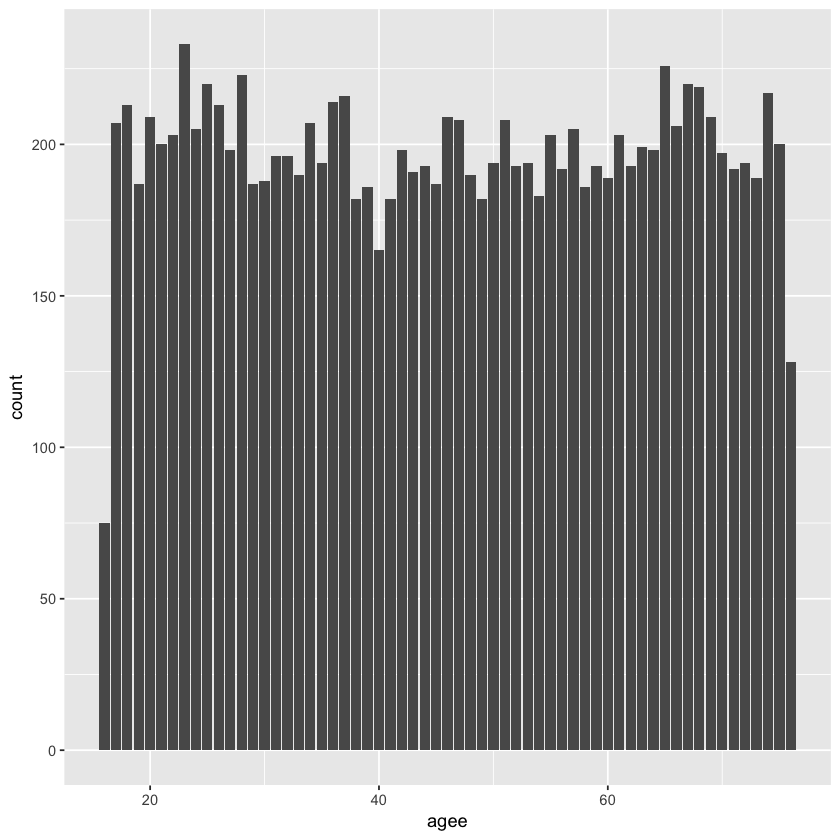

In [306]:
ggplot(data, aes(agee)) +
  geom_bar()

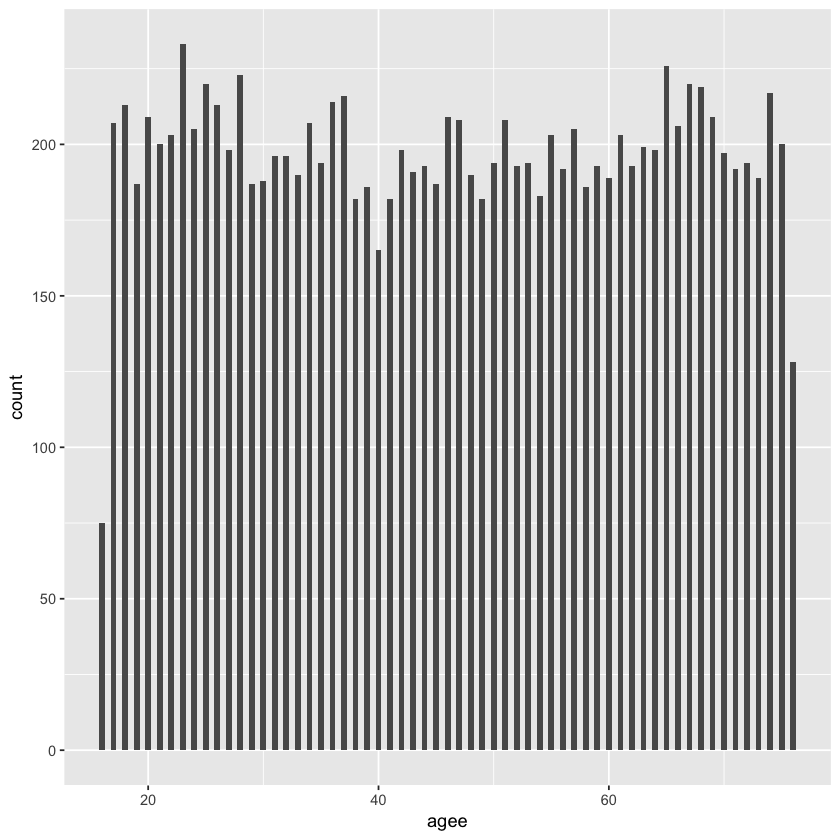

In [63]:
ggplot(data, aes(agee)) +
  geom_histogram(bins = 30, binwidth = 0.5,)

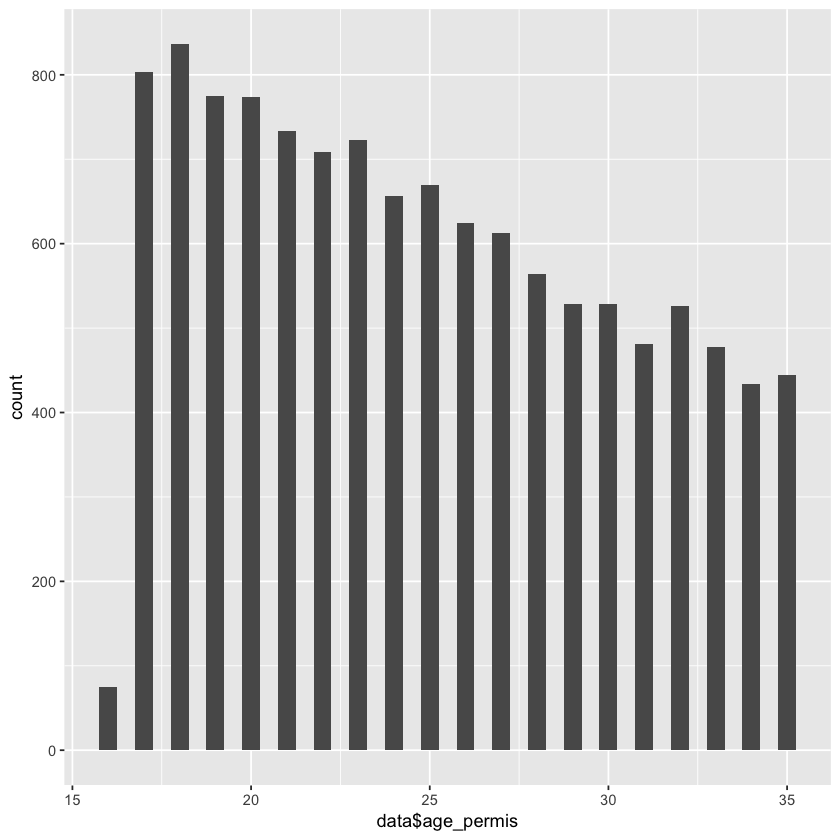

In [64]:
ggplot(data, aes(data$age_permis)) +
  geom_histogram(bins = 30, binwidth = 0.5,)

In [66]:
# ?sort

In [67]:
sort(unique(data$age_permis))

[1] 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35

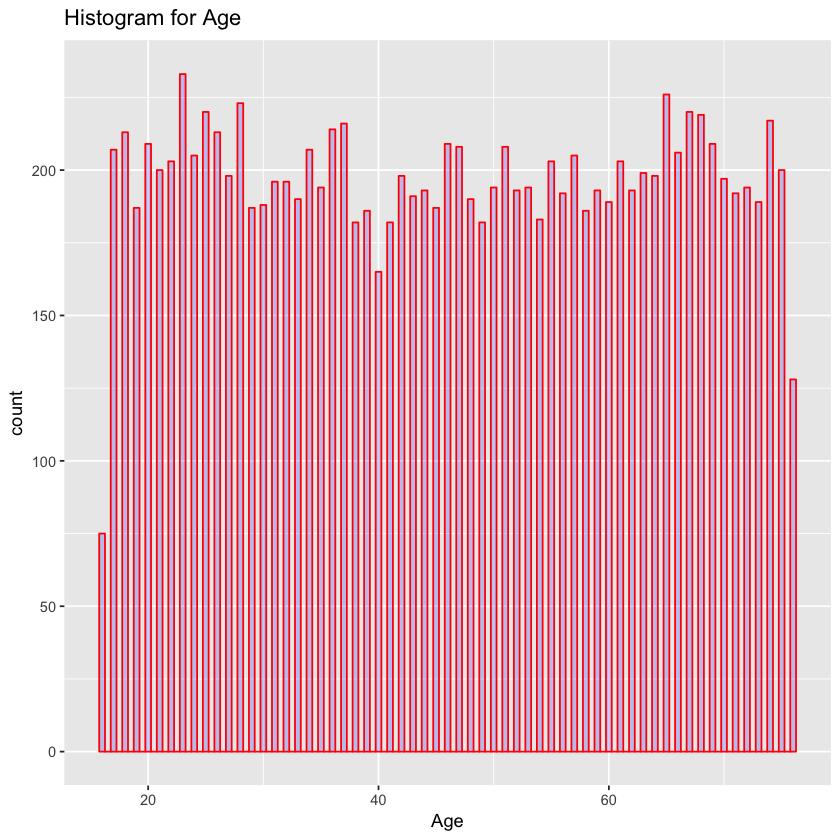

In [68]:
qplot(data$agee,
      geom="histogram",
      binwidth = 0.5,  
      main = "Histogram for Age", 
      xlab = "Age", 
      fill=I("blue"), 
      col=I("red"), 
      alpha=I(.2))

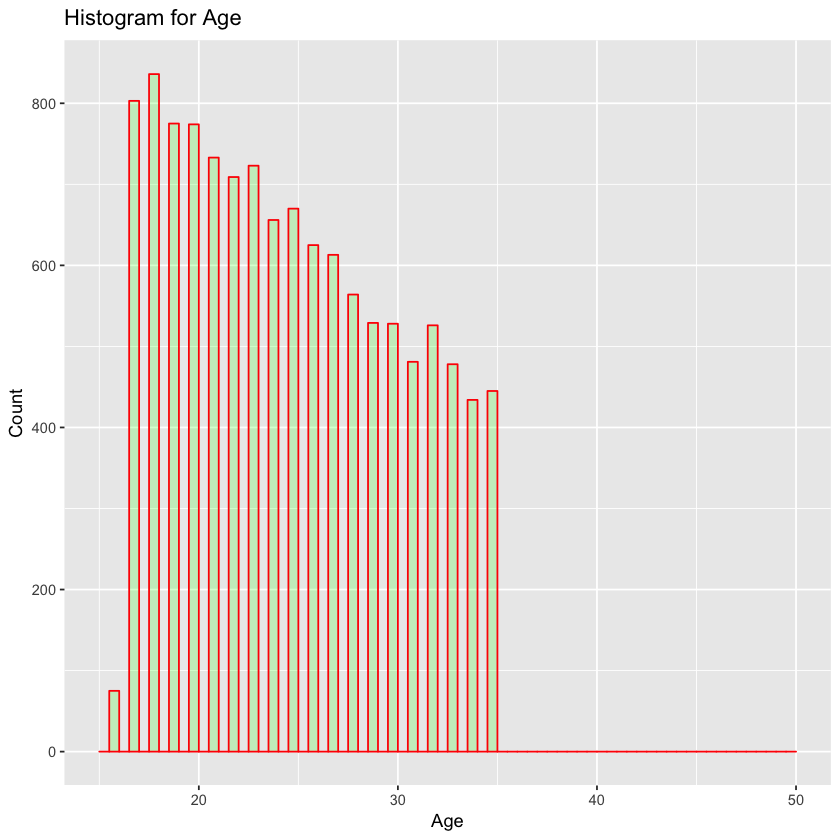

In [69]:
ggplot(data=data, aes(data$age_permis)) + 
  geom_histogram(breaks=seq(15, 50, by = .5), 
                 col="red", 
                 fill="green", 
                 alpha = .2) + 
  labs(title="Histogram for Age") +
  labs(x="Age", y="Count")

[choix de couleur](http://www.degraeve.com/color-palette/)

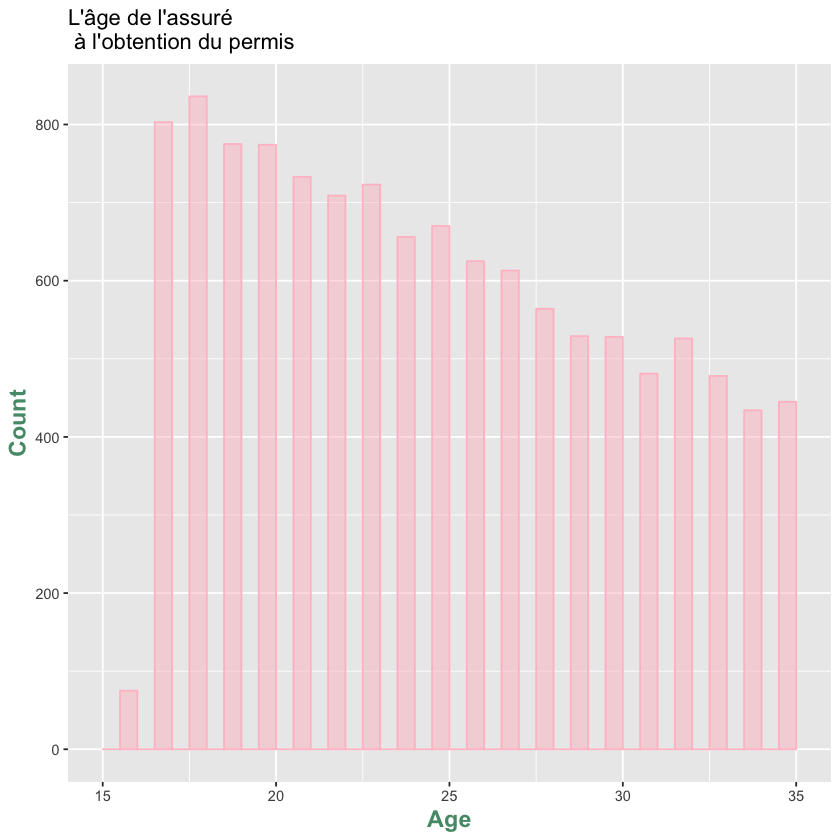

In [70]:
ggplot(data=data, aes(data$age_permis)) + 
  geom_histogram(breaks=seq(15, max(data$age_permis), by = .5), 
                 col="pink", 
                 fill="pink", 
                 alpha = .5) + 
  labs(x="Age", y="Count") + 
  theme(axis.title = element_text(color="#559977", size=14, face="bold"))+
  ggtitle("L'âge de l'assuré \n à l'obtention du permis")


# barchart

In [71]:
require("datasets")

In [72]:
head(chickwts)

weight feed     
1 179    horsebean
2 160    horsebean
3 136    horsebean
4 227    horsebean
5 217    horsebean
6 168    horsebean

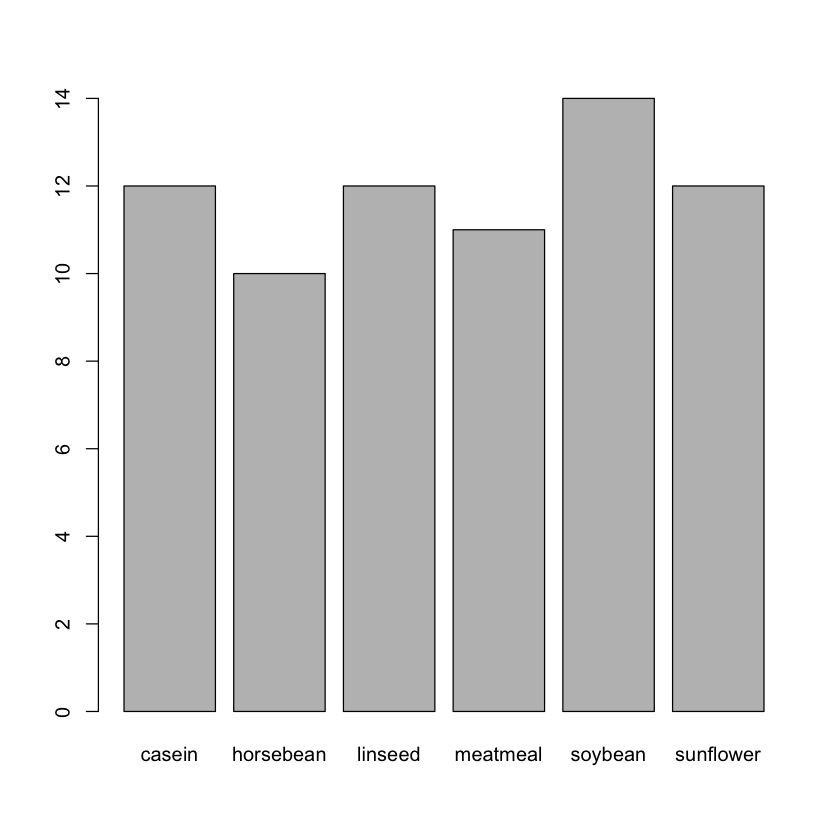

In [73]:
plot(chickwts$feed)

On va regarder une autre fonction appelée barplot. Toutfois, cette fonction nécessite une préparation des données. Nous allons alors préparer ces données

In [74]:
feeds<-table(chickwts$feed)

In [75]:
feeds


   casein horsebean   linseed  meatmeal   soybean sunflower 
       12        10        12        11        14        12 

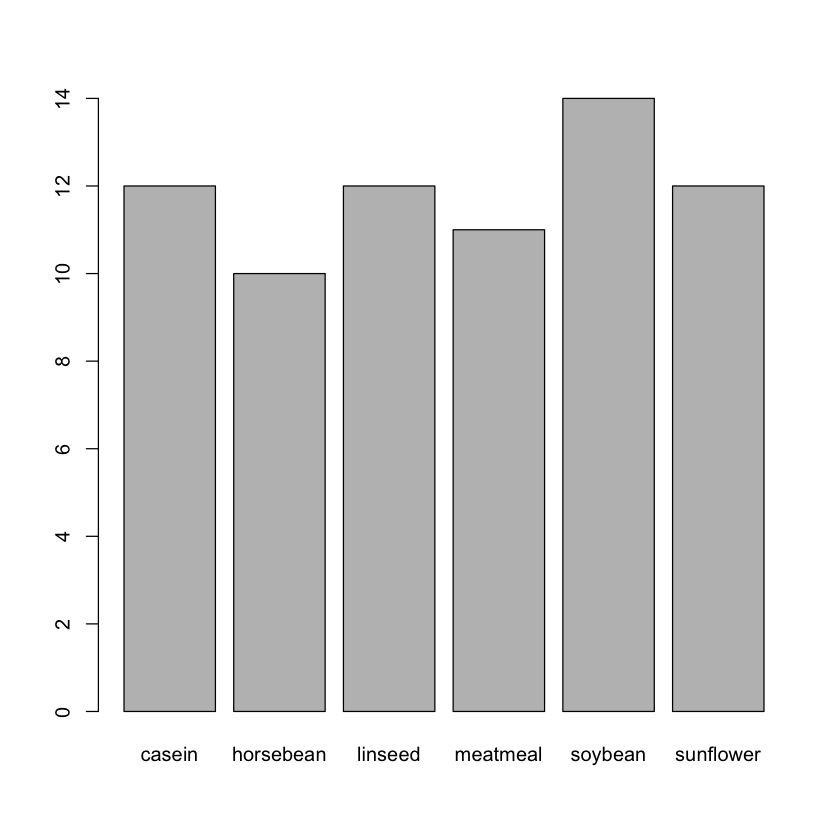

In [76]:
barplot(feeds)

L'avantage d'utiliser barplot c'est qu'il est possible de modifier cette fonction

```R
?barplots
```

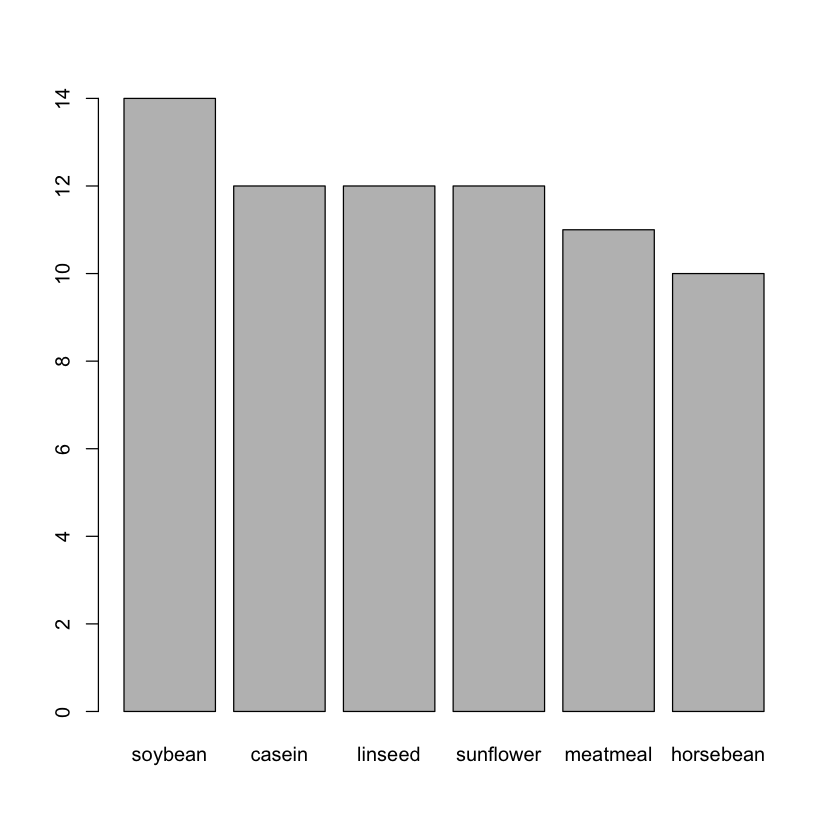

In [77]:
barplot(feeds[order(feeds, decreasing = T)])

In [78]:
lesAges<-table(data$agee)
lesAges


 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35 
 75 207 213 187 209 200 203 233 205 220 213 198 223 187 188 196 196 190 207 194 
 36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55 
214 216 182 186 165 182 198 191 193 187 209 208 190 182 194 208 193 194 183 203 
 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75 
192 205 186 193 189 203 193 199 198 226 206 220 219 209 197 192 194 189 217 200 
 76 
128 

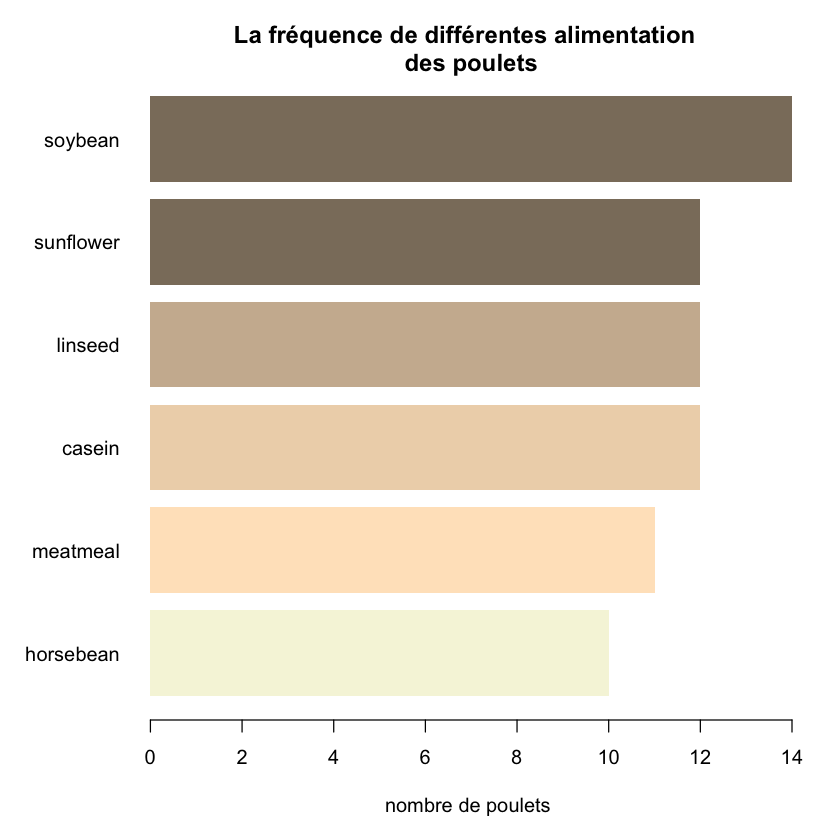

In [79]:
par(oma=c(1,1,1,1)) # set outside margin 
par(mar=c(4,5,2,1))
barplot(feeds[order(feeds)],
       horiz=T, 
       las=1, #orientation de l'axe des x
       col=c("beige", "bisque1", "bisque2", "bisque3", "bisque4", "bisque4"),
       border=NA,
       main="La fréquence de différentes alimentation \n des poulets",
       xlab="nombre de poulets")

# ggplot

## Bar

In [163]:
dat <- data.frame(
  examen =c("Examen_1","Examen_2"),
  moyenne = c(20, 24)
)

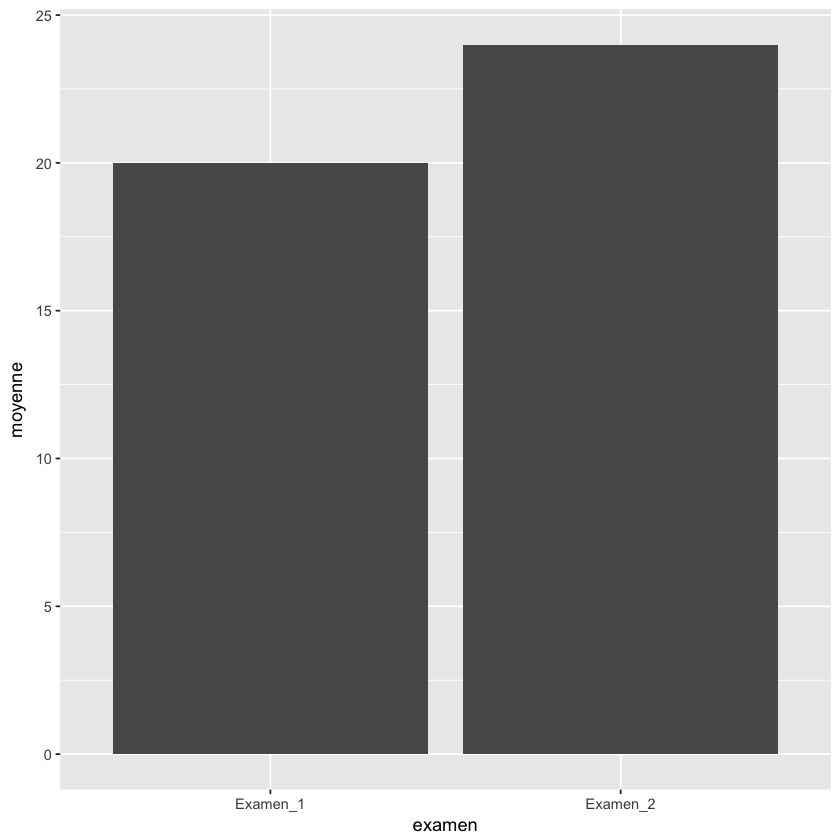

In [164]:
ggplot(data=dat, aes(x=examen, y=moyenne)) +
    geom_bar(stat="identity")

En couleur, on différencie chacun des examen

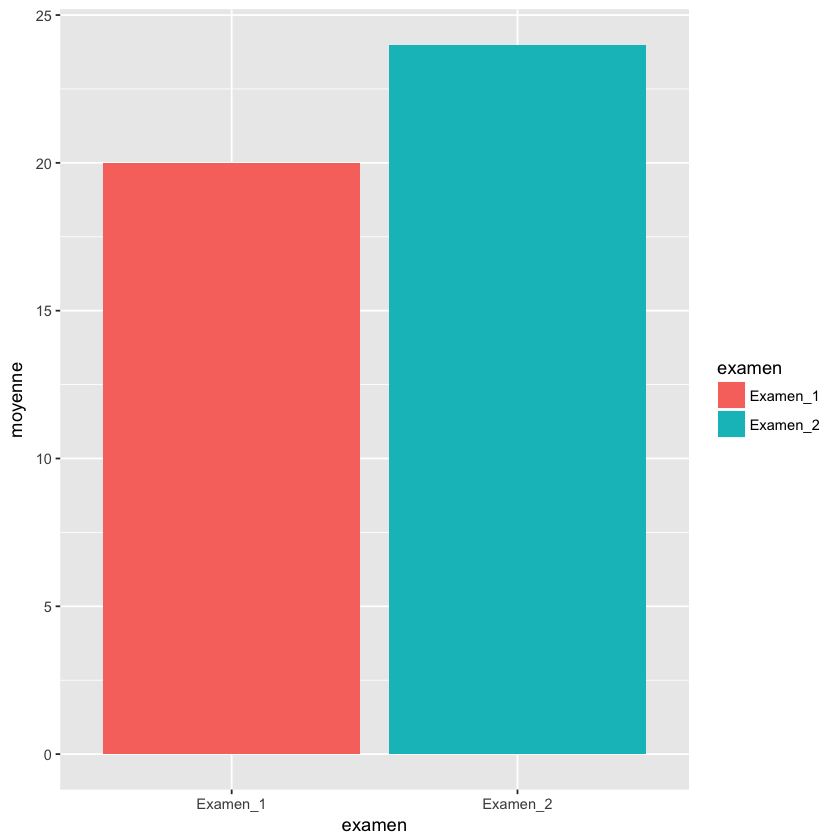

In [165]:
ggplot(data=dat, aes(x=examen, y=moyenne, fill=examen)) +
    geom_bar(stat="identity")

Ajoutons un ecadré noir:

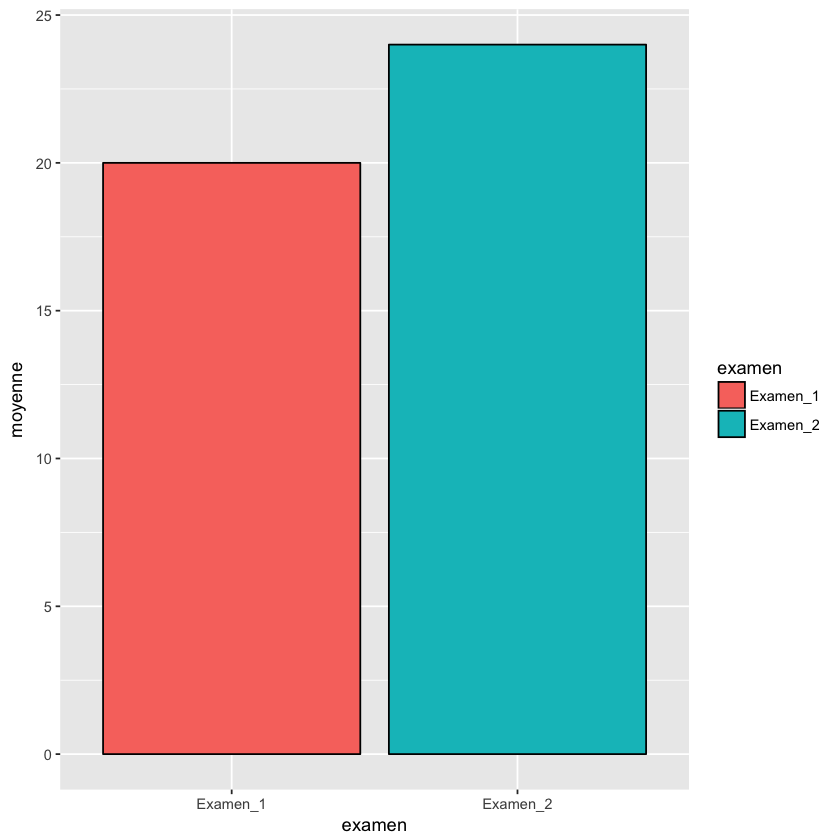

In [166]:
ggplot(data=dat, aes(x=examen, y=moyenne, fill=examen)) +
    geom_bar(col="black",stat="identity")

On voit bien que la légende ne sert pas à grande chose

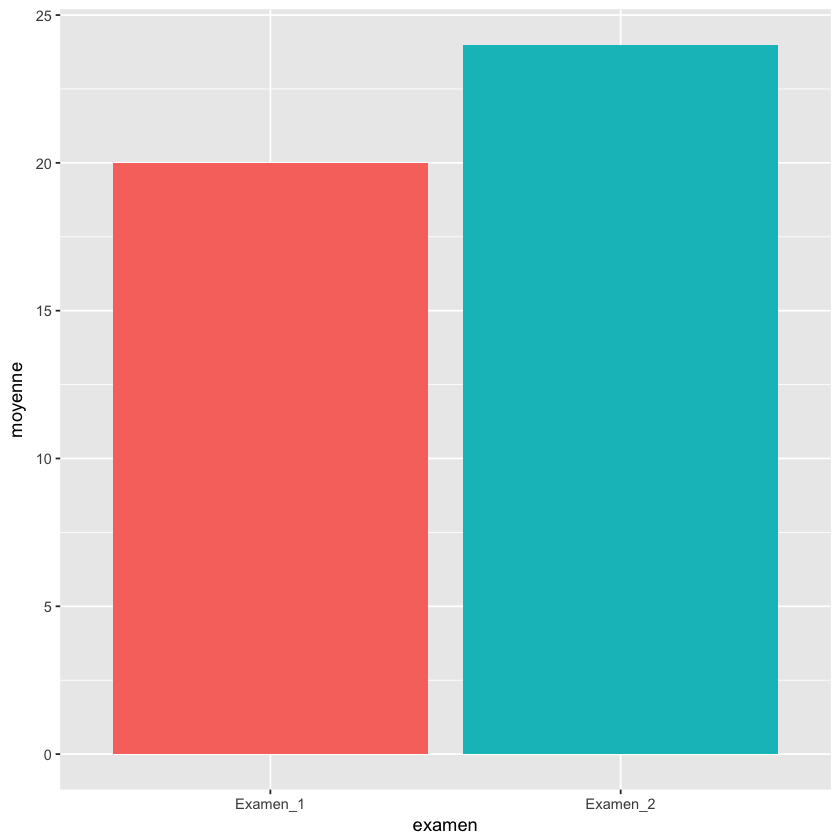

In [167]:
ggplot(data=dat, aes(x=examen, y=moyenne, fill=examen)) +
    geom_bar(stat="identity")+
    guides(fill=FALSE)

Travaillons avec les vraies couleurs

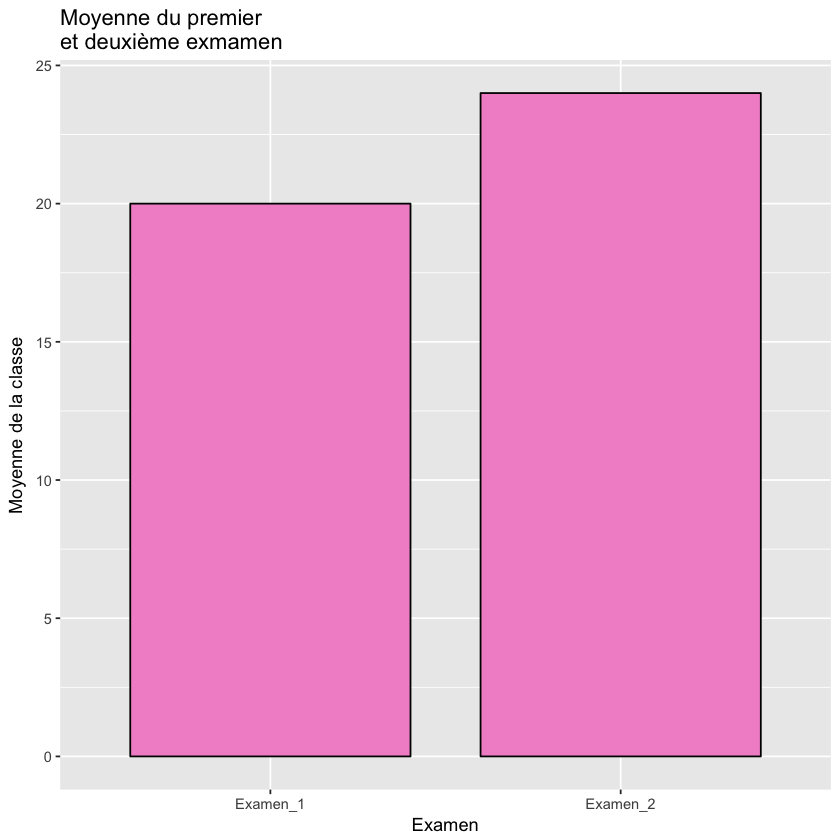

In [168]:
ggplot(data=dat, aes(x=examen, y=moyenne, fill=examen)) +
    geom_bar(colour="black", fill="#f293ce", width=.8, stat="identity") + 
    guides(fill=FALSE) +
    xlab("Examen") + ylab("Moyenne de la classe") +
    ggtitle("Moyenne du premier \net deuxième exmamen")

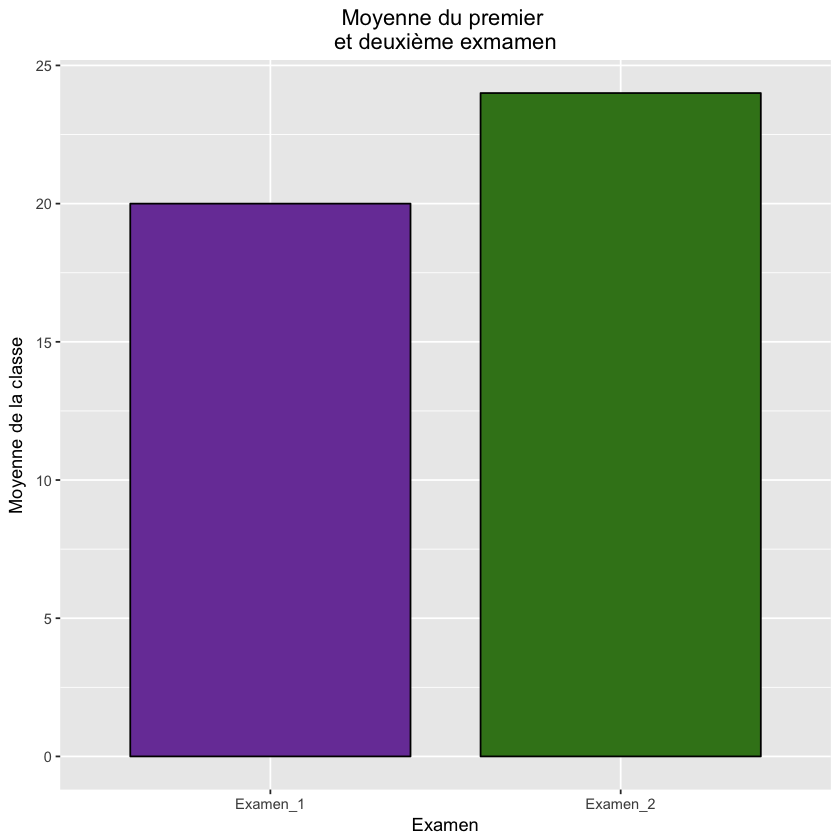

In [291]:
ggplot(data=dat, aes(x=examen, y=moyenne, fill=examen)) +
    geom_bar(colour="black", fill=c("#7A41A6","#3C811E"), width=.8, stat="identity") + 
    guides(fill=FALSE) +
    xlab("Examen") + ylab("Moyenne de la classe") +
    ggtitle("Moyenne du premier \net deuxième exmamen")+
    theme(plot.title = element_text(hjust = 0.5))

## Bar graphs of counts

In [171]:
# install.packages("reshape2")

In [172]:
library(reshape2)

In [173]:
head(tips)

total_bill tip  sex    smoker day time   size
1 16.99      1.01 Female No     Sun Dinner 2   
2 10.34      1.66 Male   No     Sun Dinner 3   
3 21.01      3.50 Male   No     Sun Dinner 3   
4 23.68      3.31 Male   No     Sun Dinner 2   
5 24.59      3.61 Female No     Sun Dinner 4   
6 25.29      4.71 Male   No     Sun Dinner 4

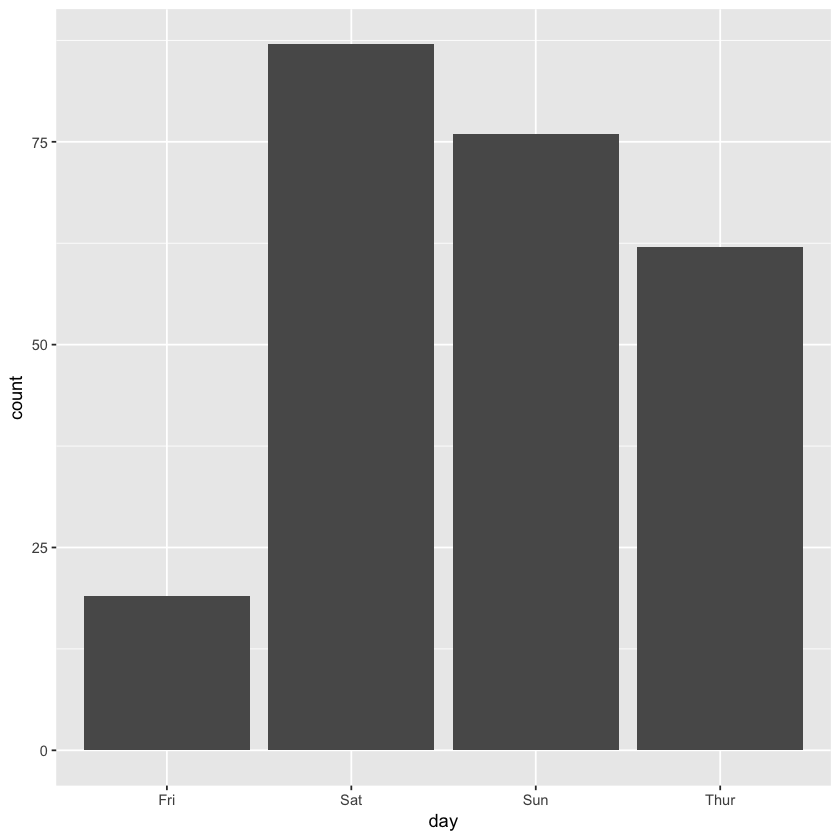

In [174]:
ggplot(data=tips, aes(x=day)) +
    geom_bar(stat="count")

## Line graphs

## Basic line graph

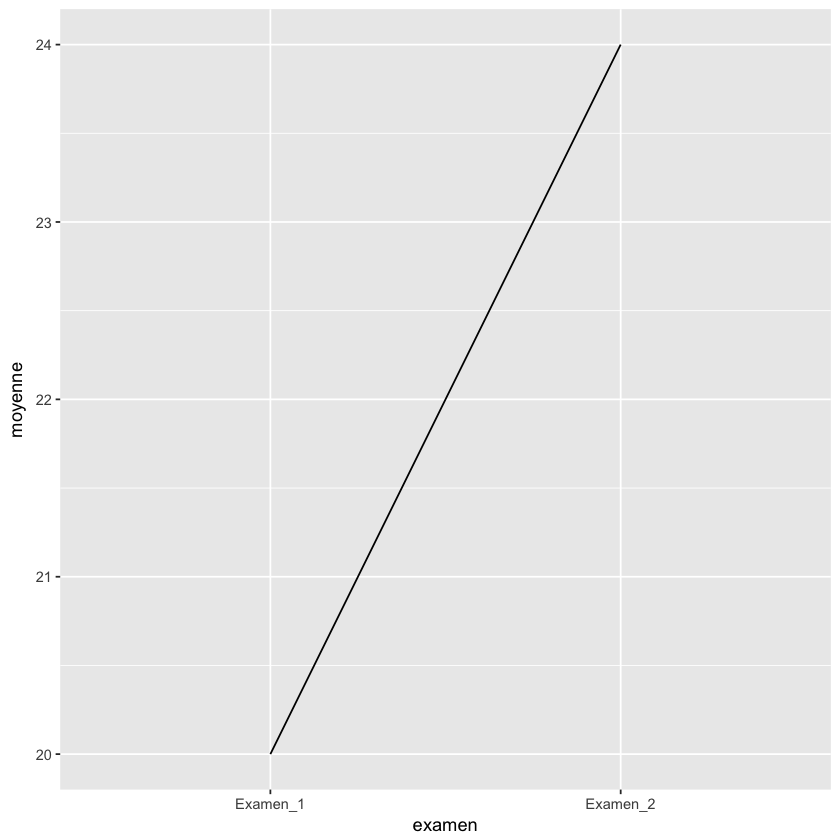

In [179]:
ggplot(data=dat, aes(x=examen, y=moyenne,group=1))+ #puisque on a un seul groupe de points
     geom_line()

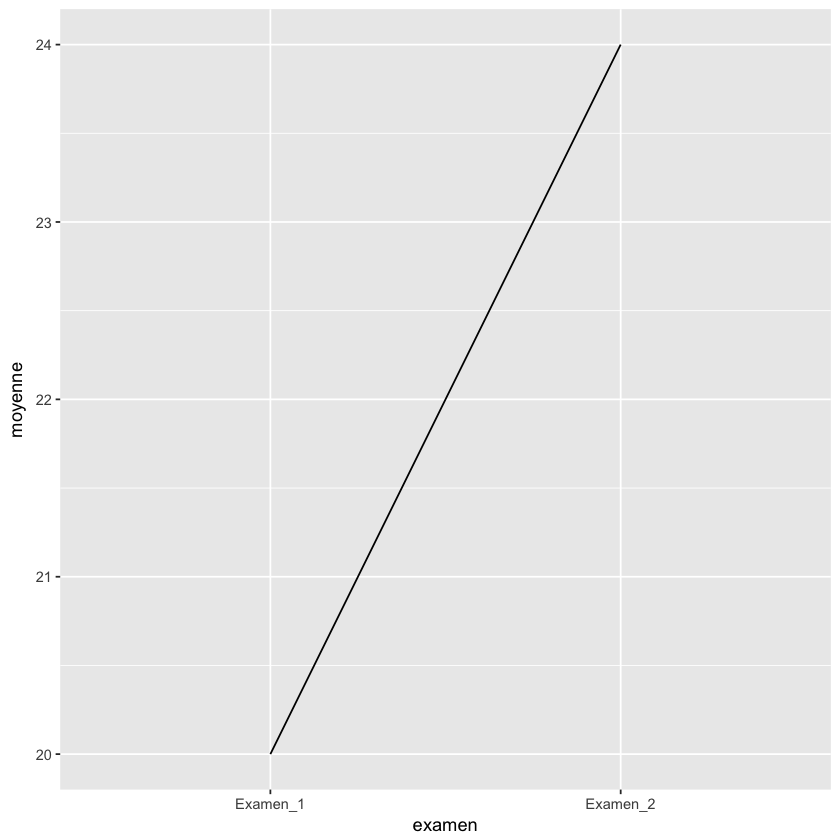

In [178]:
# ggplot(data=dat, aes(x=time, y=total_bill)) +
#     geom_line(aes(group=1))
ggplot(data=dat, aes(x=examen, y=moyenne))+
     geom_line(aes(group=1))

Ajouter des points:

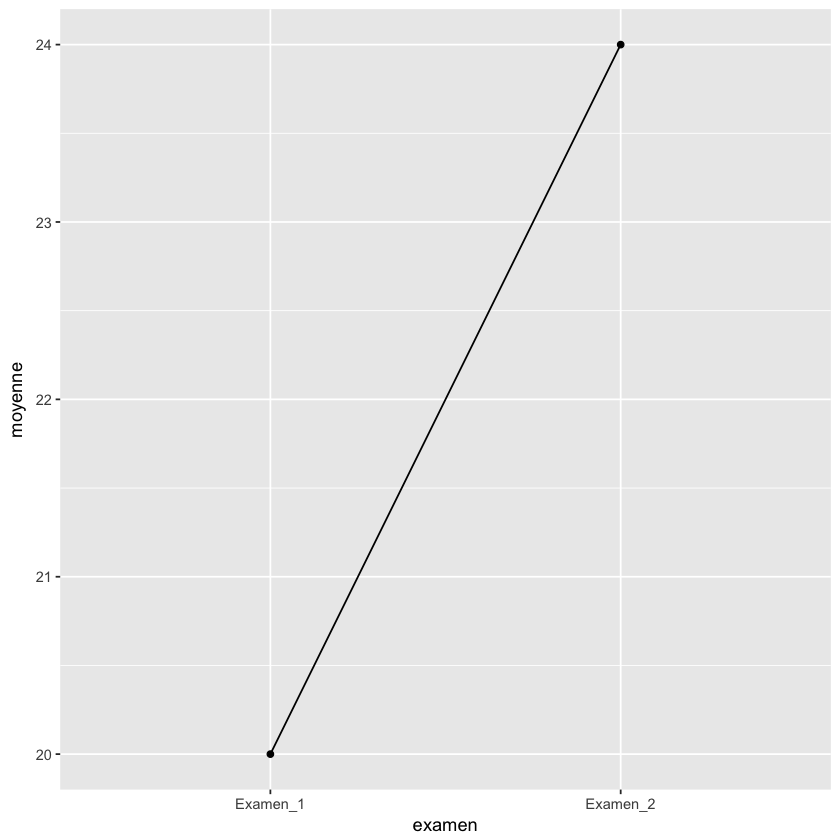

In [180]:
ggplot(data=dat, aes(x=examen, y=moyenne,group=1))+
    geom_line() +
    geom_point()

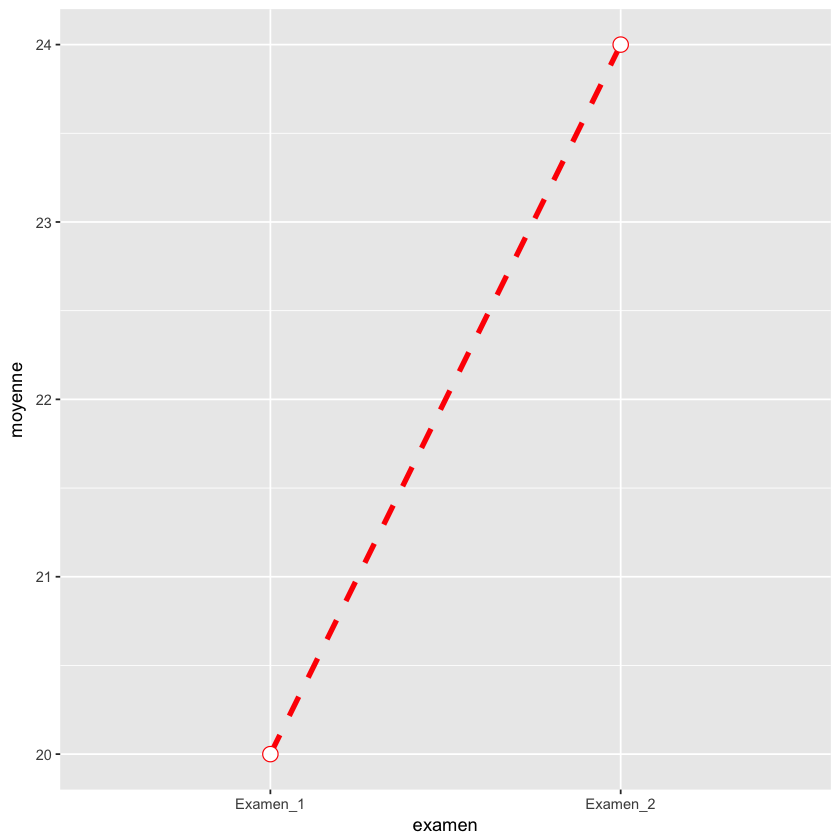

In [181]:
ggplot(data=dat, aes(x=examen, y=moyenne,group=1))+
    geom_line(colour="red", linetype="dashed", size=1.5) + 
    geom_point(colour="red", size=4, shape=21, fill="white")

In [183]:
dat2 <- data.frame(
  examen =c("Examen_1","Examen_2","Examen_3"),
  moyenne = c(20, 24, 26)
)

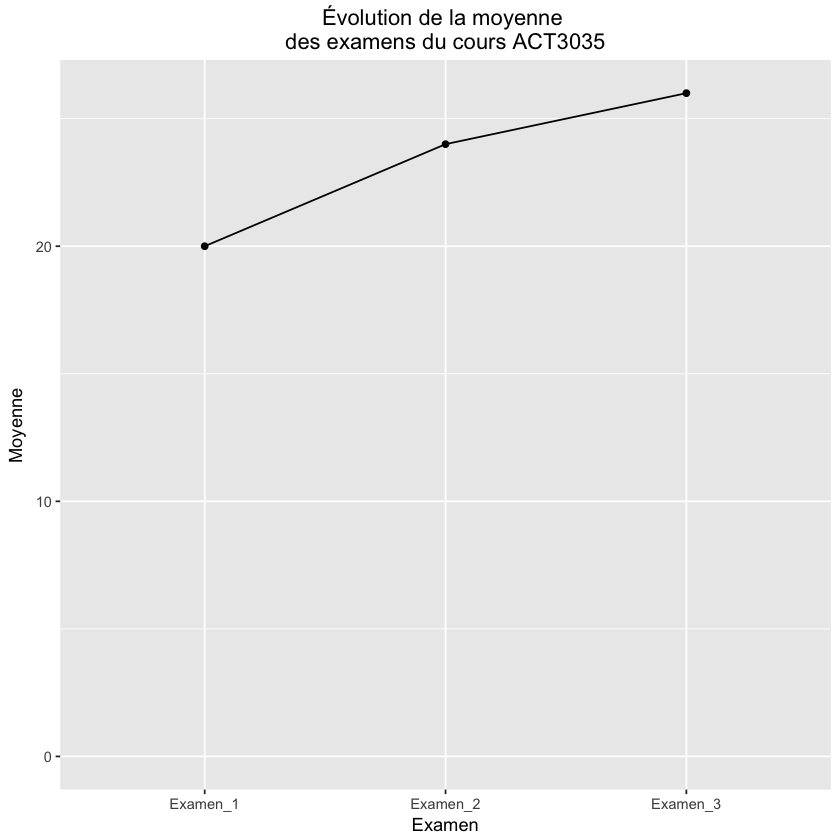

In [189]:
ggplot(data=dat2, aes(x=examen, y=moyenne,group=1))+
    geom_line() +
    geom_point() +
    expand_limits(y=0) +
    xlab("Examen") + ylab("Moyenne") +
    ggtitle("Évolution de la moyenne \ndes examens du cours ACT3035") +
    theme(plot.title = element_text(hjust = 0.5))

In [208]:
dat3 <- data.frame(
    session = factor(c("S1","S1","S2","S2")),
    examen = c("Examen_1","Examen_2","Examen_1","Examen_2"),
    moyenne = c(20, 24, 21, 22)
)

In [209]:
head(dat3)

session examen   moyenne
1 S1      Examen_1 20     
2 S1      Examen_2 24     
3 S2      Examen_1 21     
4 S2      Examen_2 22

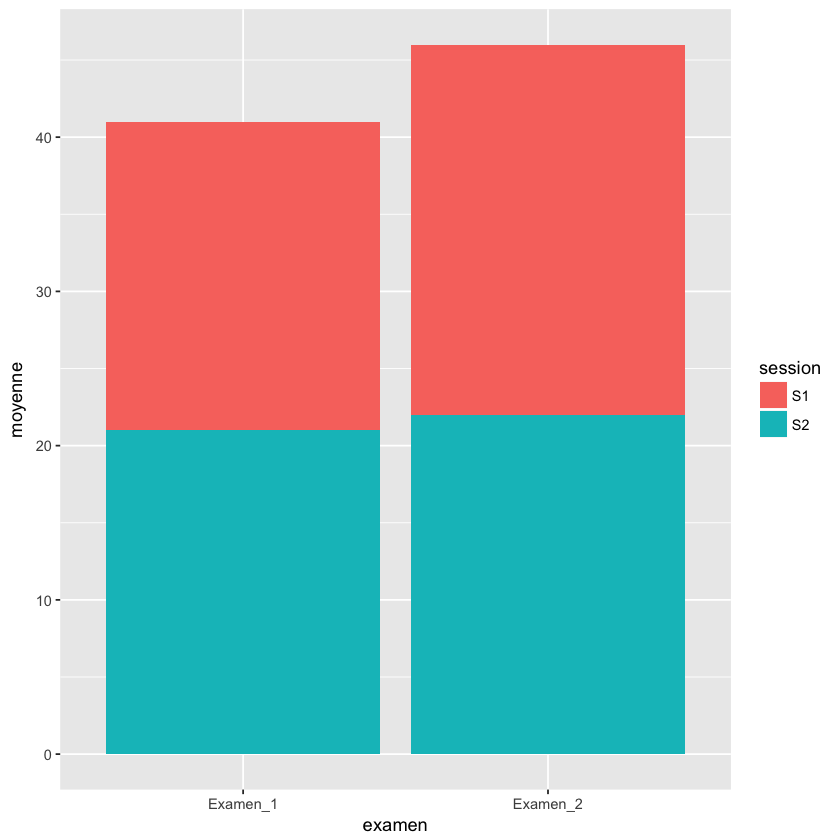

In [210]:
ggplot(data=dat3, aes(x=examen, y=moyenne, fill=session)) +
    geom_bar(stat="identity")

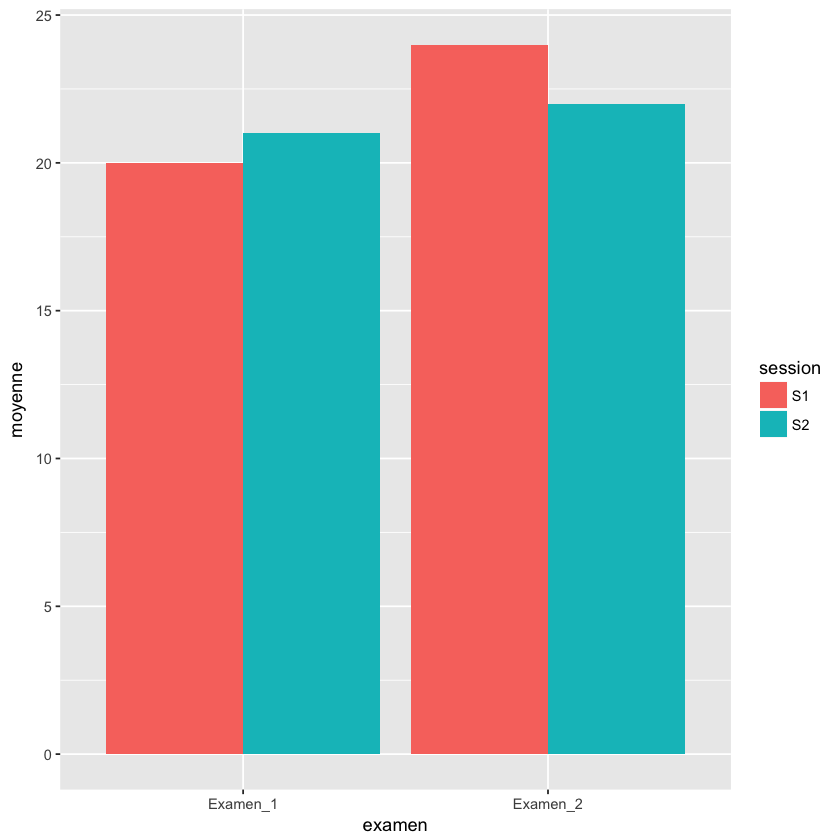

In [211]:
ggplot(data=dat3, aes(x=examen, y=moyenne, fill=session)) +
    geom_bar(stat="identity", position=position_dodge())

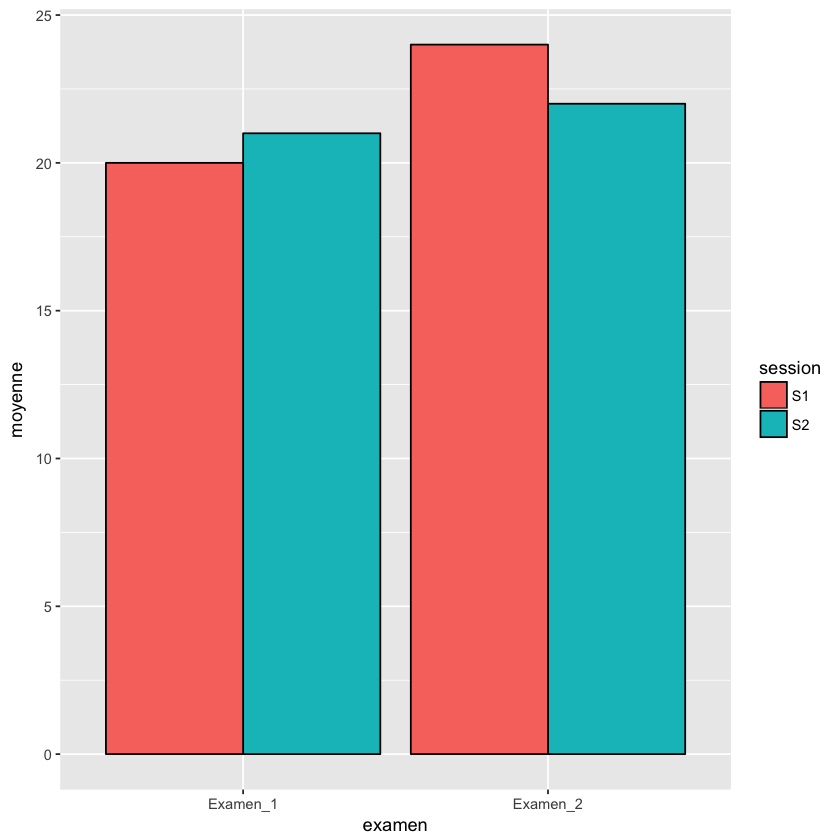

In [212]:
ggplot(data=dat3, aes(x=examen, y=moyenne, fill=session)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black")

In [225]:
dat4 <- data.frame(
    session = factor(c("S1","S1","S1","S2","S2","S2")),
    examen = c("Examen_1","Examen_2", "Examen_3","Examen_1","Examen_2", "Examen_3"),
    moyenne = c(20, 24, 26, 21, 22, 23)
)

In [226]:
head(dat4)

session examen   moyenne
1 S1      Examen_1 20     
2 S1      Examen_2 24     
3 S1      Examen_3 26     
4 S2      Examen_1 21     
5 S2      Examen_2 22     
6 S2      Examen_3 23

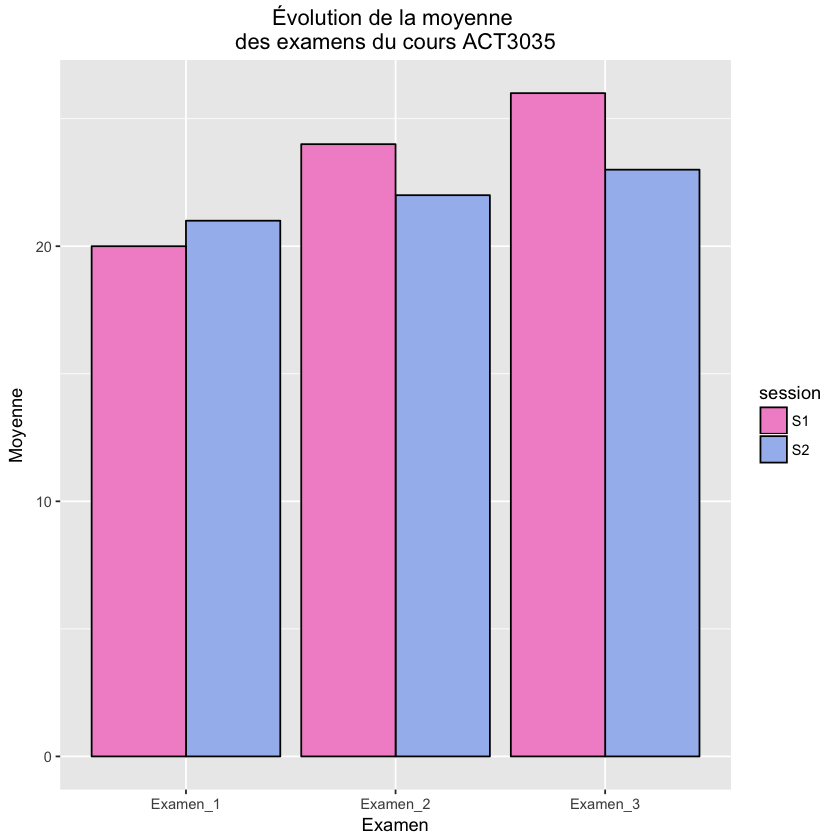

In [230]:
ggplot(data=dat4, aes(x=examen, y=moyenne, fill=session)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black")+
    scale_fill_manual(values=c("#f293ce", "#a5bcef")) +
    xlab("Examen") + ylab("Moyenne") +
    ggtitle("Évolution de la moyenne \ndes examens du cours ACT3035") +
    theme(plot.title = element_text(hjust = 0.5))

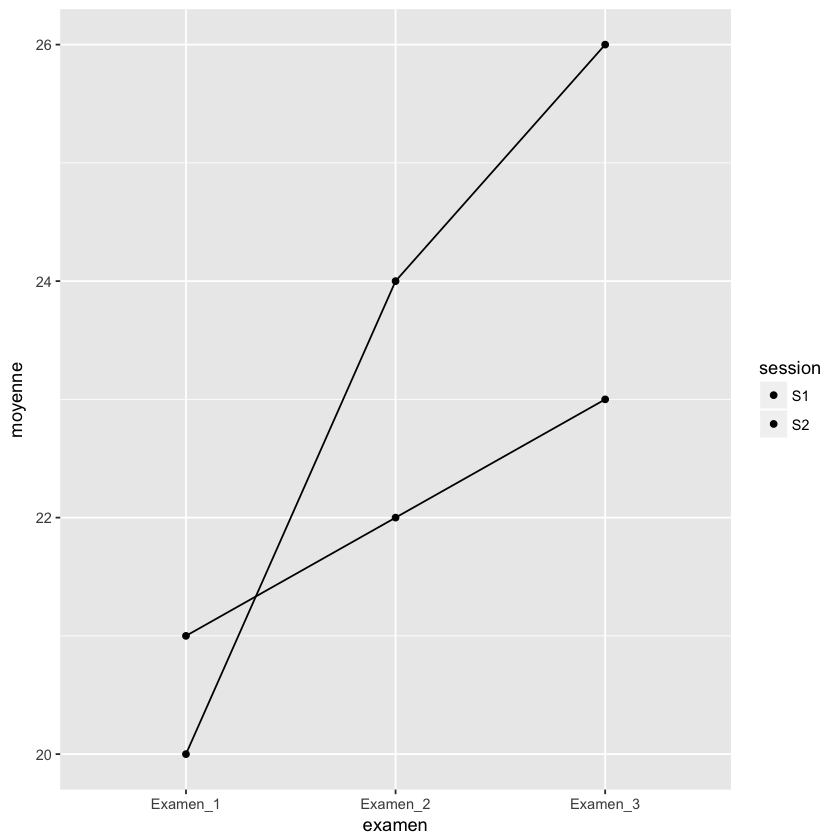

In [239]:
ggplot(data=dat4, aes(x=examen, y=moyenne, group=session, fill=session)) +
    geom_line() +
    geom_point()

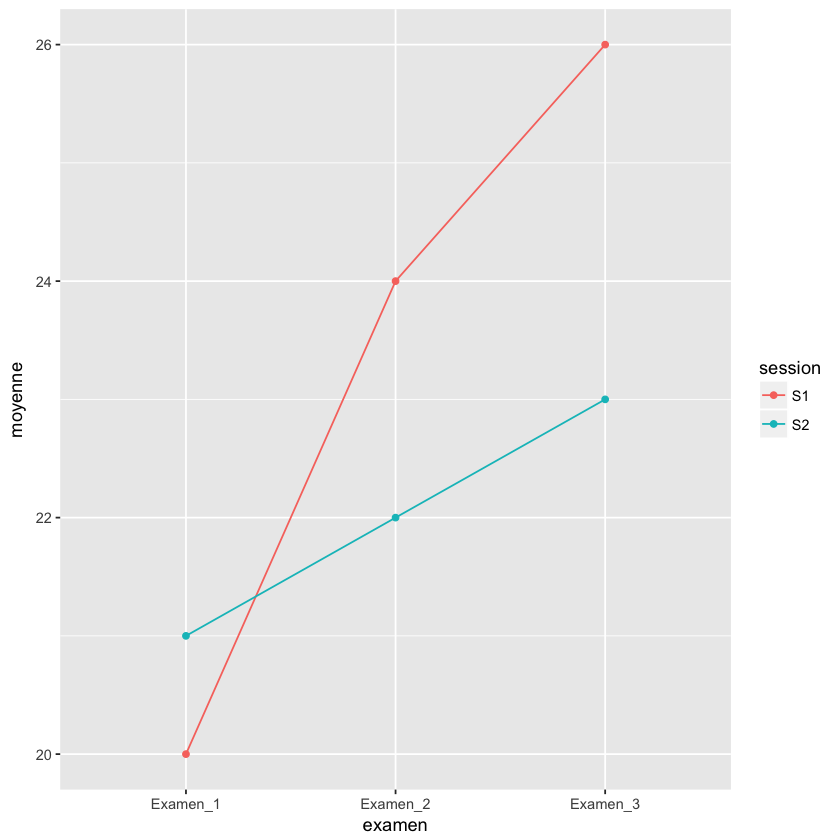

In [262]:
ggplot(data=dat4, aes(x=examen, y=moyenne, group=session, fill=session, color=session)) +
    geom_line() +
    geom_point()

In [255]:
ggplot(data=dat4, aes(x=examen, y=moyenne, group=session, fill=session, color=session)) +
    geom_errorbar(aes(ymin=len-ci, ymax=len+ci), colour="black", width=.1, position=pd) +
    geom_line(position=pd) +
    geom_point(position=pd, size=3)

session examen   moyenne
1 S1      Examen_1 20     
2 S1      Examen_2 24     
3 S1      Examen_3 26     
4 S2      Examen_1 21     
5 S2      Examen_2 22     
6 S2      Examen_3 23

$${\sigma }_{\bar {x}}\ ={\frac {\sigma }{\sqrt {n}}}$$

In [256]:
dat4$se<-c(.33, .27, .5, .25, .7, .5)

In [258]:
dat4

session examen   moyenne se  
1 S1      Examen_1 20      0.33
2 S1      Examen_2 24      0.27
3 S1      Examen_3 26      0.50
4 S2      Examen_1 21      0.25
5 S2      Examen_2 22      0.70
6 S2      Examen_3 23      0.50

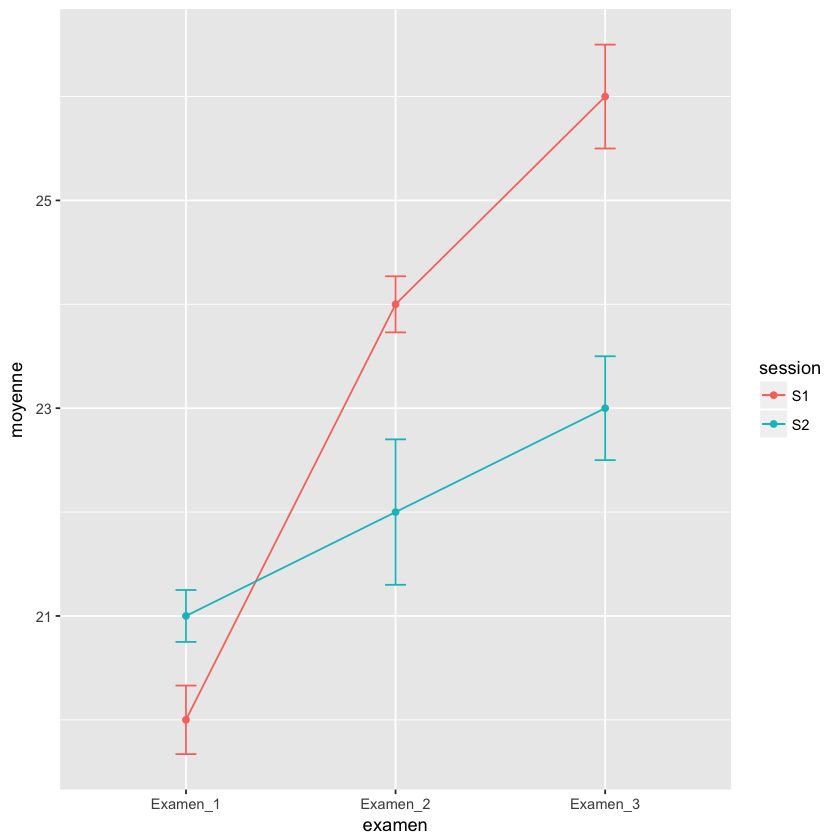

In [260]:
ggplot(dat4, aes(x=examen, y=moyenne, colour=session, group=session,)) + 
    geom_errorbar(aes(ymin=moyenne-se, ymax=moyenne+se), width=.1) +
    geom_line() +
    geom_point()

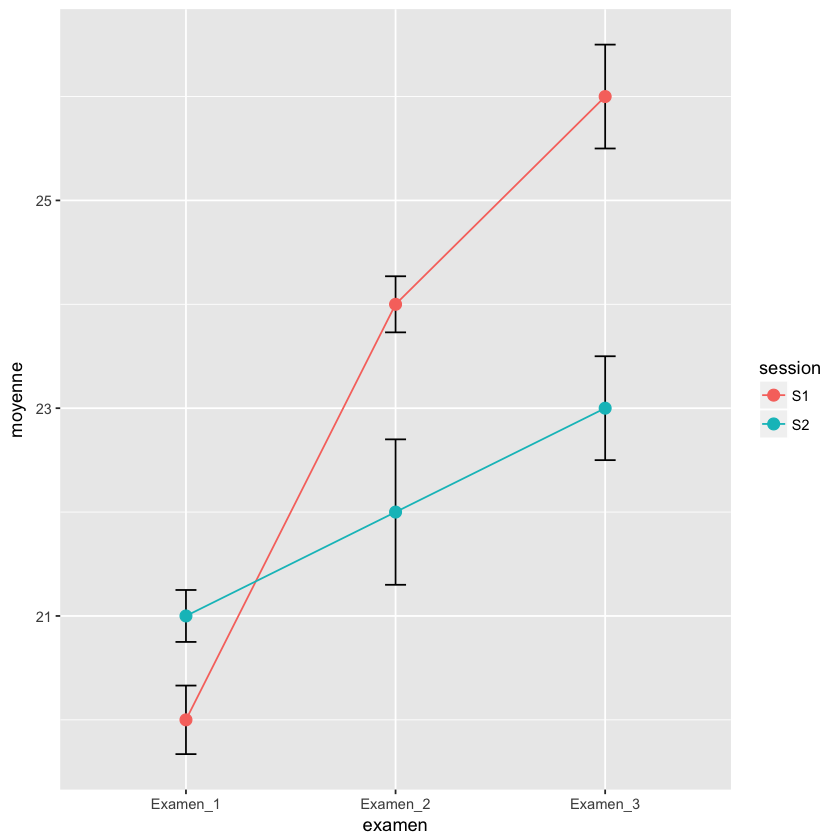

In [265]:
ggplot(dat4, aes(x=examen, y=moyenne, colour=session, group=session,)) + 
    geom_errorbar(aes(ymin=moyenne-se, ymax=moyenne+se), colour="black", width=.1) +
    geom_line() +
    geom_point(size=3)

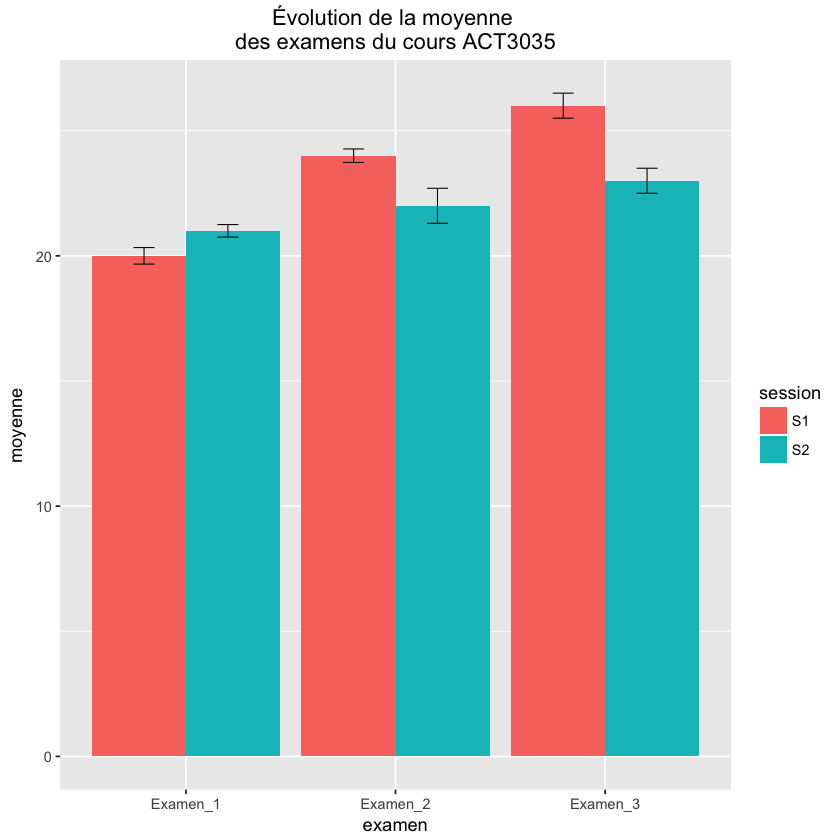

In [287]:
ggplot(dat4, aes(x=examen, y=moyenne, fill=session)) + 
    geom_bar(position=position_dodge(), stat="identity") +
    geom_errorbar(aes(ymin=moyenne-se, ymax=moyenne+se),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.8),
                size=.3    # Thinner lines
                 )+
    ggtitle("Évolution de la moyenne \ndes examens du cours ACT3035") +
    theme(plot.title = element_text(hjust = 0.5))

In [251]:
library(Rmisc)

Loading required package: lattice


In [252]:
tgc <- summarySE(tg, measurevar="len", groupvars=c("supp","dose"))
tgc

supp dose N  len   sd       se        ci      
1 OJ   0.5  10 13.23 4.459709 1.4102837 3.190283
2 OJ   1.0  10 22.70 3.910953 1.2367520 2.797727
3 OJ   2.0  10 26.06 2.655058 0.8396031 1.899314
4 VC   0.5  10  7.98 2.746634 0.8685620 1.964824
5 VC   1.0  10 16.77 2.515309 0.7954104 1.799343
6 VC   2.0  10 26.14 4.797731 1.5171757 3.432090

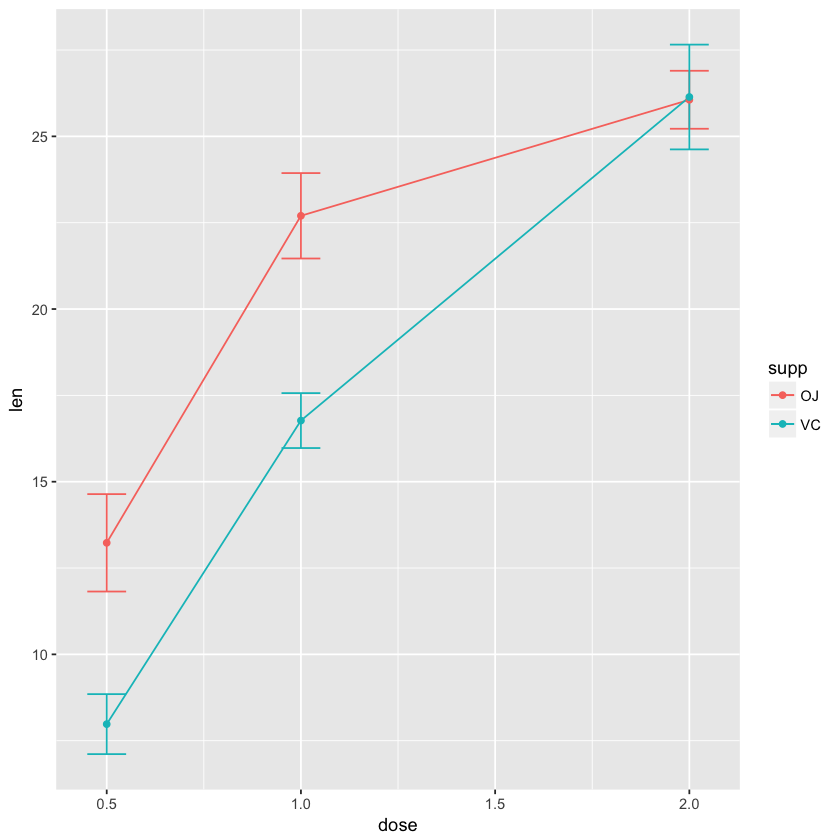

In [253]:
ggplot(tgc, aes(x=dose, y=len, colour=supp)) + 
    geom_errorbar(aes(ymin=len-se, ymax=len+se), width=.1) +
    geom_line() +
    geom_point()

# Pie Charts

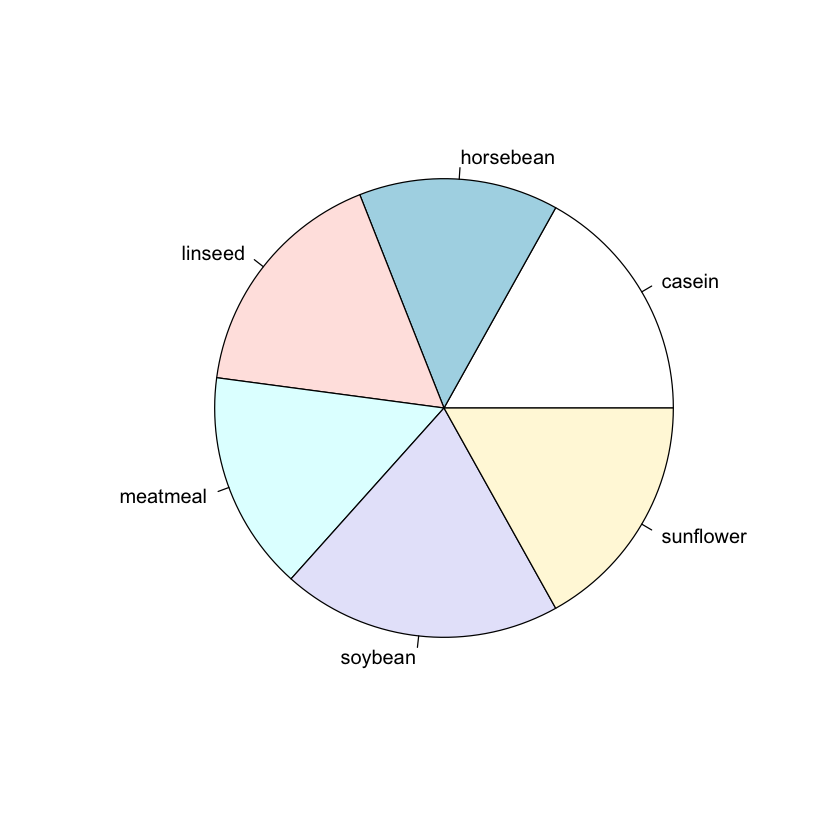

In [80]:
pie(feeds) #un ballon de plage

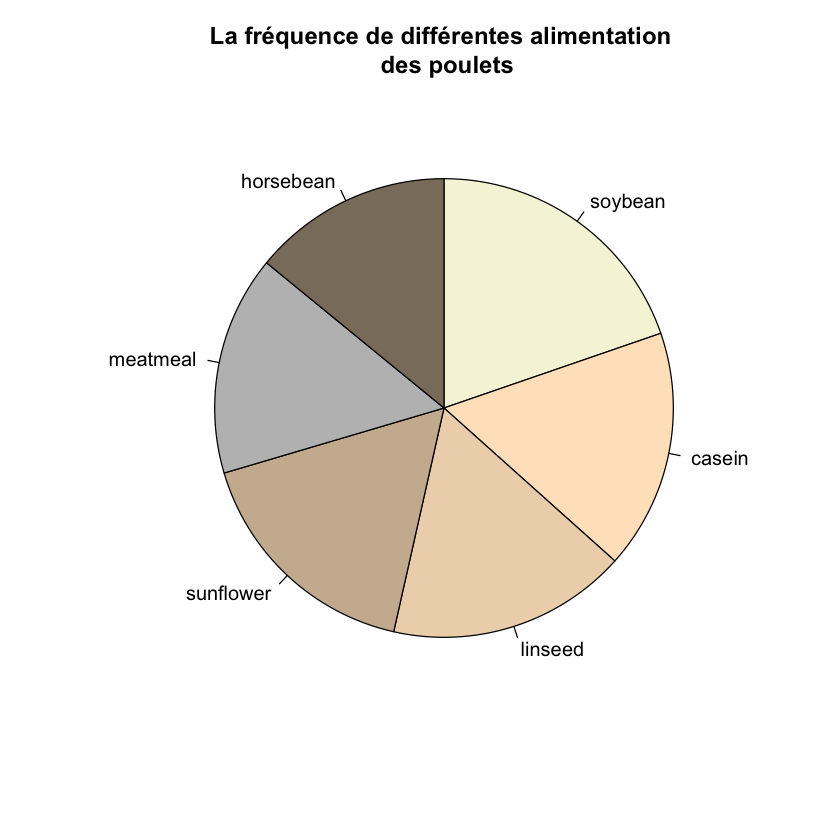

In [81]:
pie(feeds[order(feeds, decreasing = T)],
   init.angle=90,
   clockwise=T, 
   col=c("beige", "bisque1", "bisque2", "bisque3", "grey", "bisque4"),
   main="La fréquence de différentes alimentation \n des poulets")

# The Difference Between Bar Charts and Histograms

With bar charts, each column represents a group defined by a categorical variable; and with histograms, each column represents a group defined by a continuous, quantitative variable.

![The Difference Between Bar Charts and Histograms](https://www.edrawsoft.com/howto/charts-comparison.png)

# Histogramme

In [82]:
head(lynx)

[1]  269  321  585  871 1475 2821

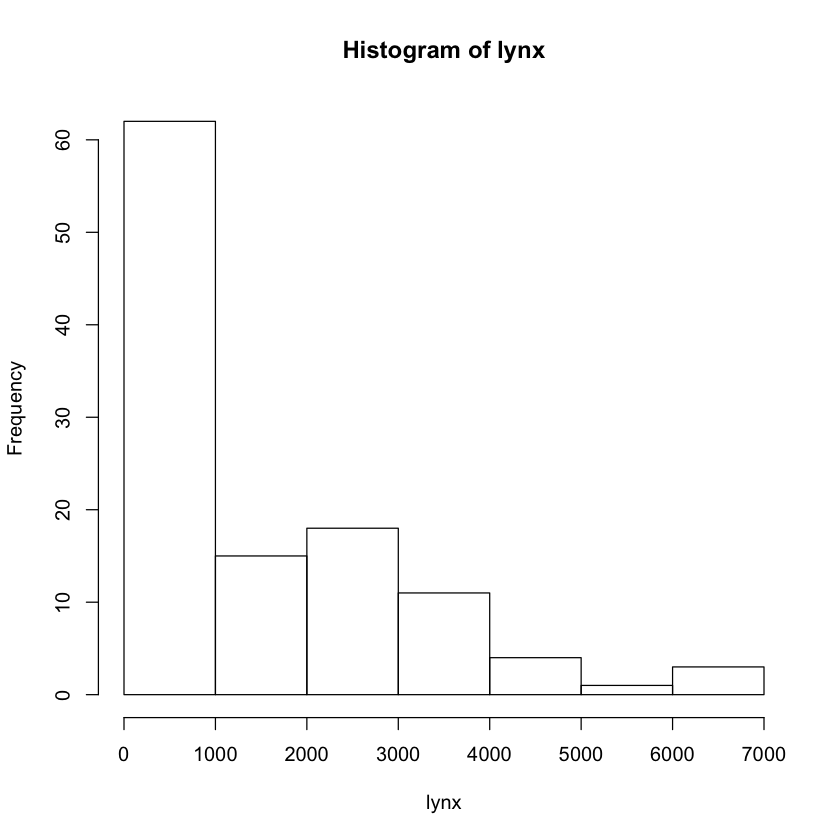

In [83]:
hist(lynx)

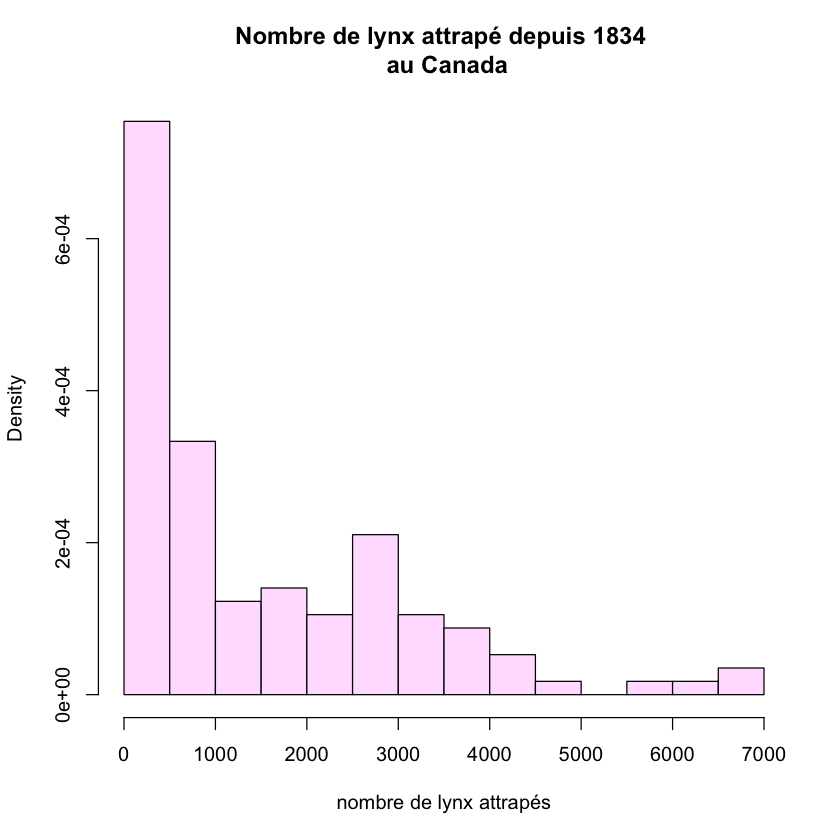

In [84]:
h<-hist(lynx,
       breaks=11,
       freq=FALSE,
       col="thistle1",
        main="Nombre de lynx attrapé depuis 1834 \n au Canada",
        xlab="nombre de lynx attrapés")

In [85]:
set.seed(1234)
dat <- data.frame(cond = factor(rep(c("A","B"), each=200)), 
                   rating = c(rnorm(200),rnorm(200, mean=.8)))

In [86]:
head(dat)

cond rating    
1 A    -1.2070657
2 A     0.2774292
3 A     1.0844412
4 A    -2.3456977
5 A     0.4291247
6 A     0.5060559

In [87]:
tail(dat)

cond rating    
395 B     1.3287450
396 B     1.5893944
397 B     1.2570995
398 B     1.3388331
399 B     0.8146431
400 B    -0.1164891

Créons un histogram qui représente les valeurs de la colonne `rating`

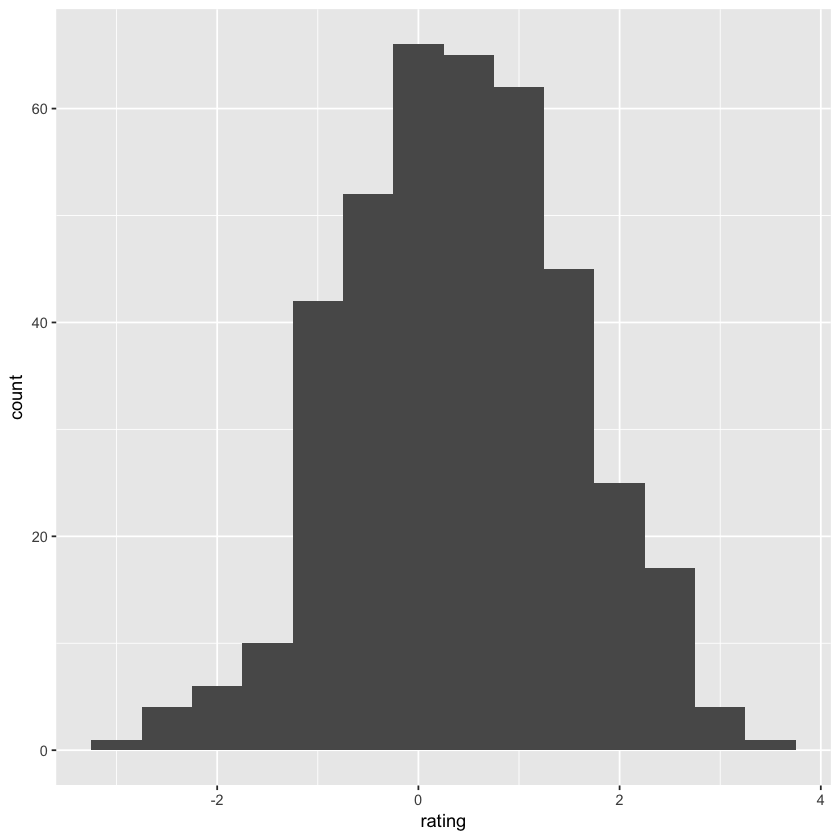

In [88]:
ggplot(dat, aes(x=rating)) + geom_histogram(binwidth=.5)

Dans le graphique plu haut, on ne voit pas bien les séparations;

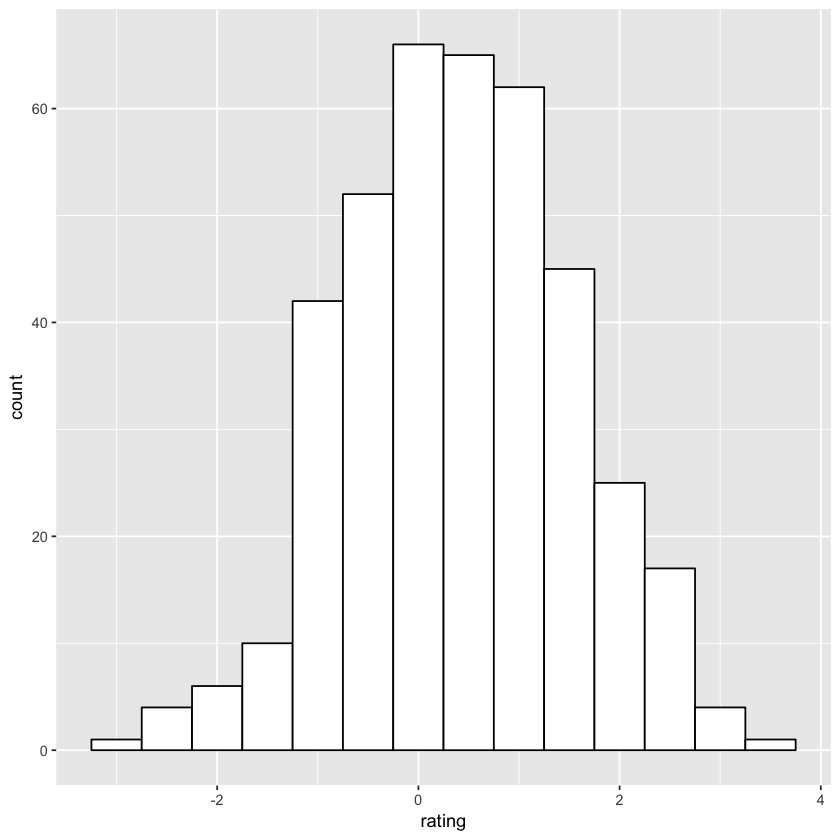

In [89]:
ggplot(dat, aes(x=rating)) +
    geom_histogram(binwidth=.5, colour="black", fill="white")

# Density curve

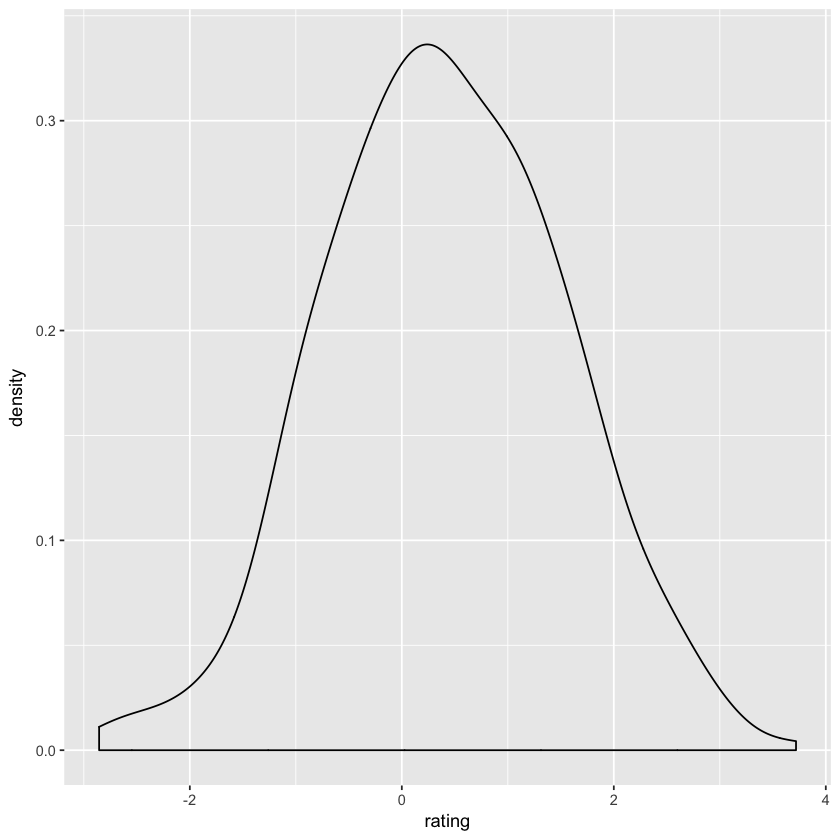

In [90]:
ggplot(dat, aes(x=rating)) + geom_density()

# Histogram overlaid with kernel density curve

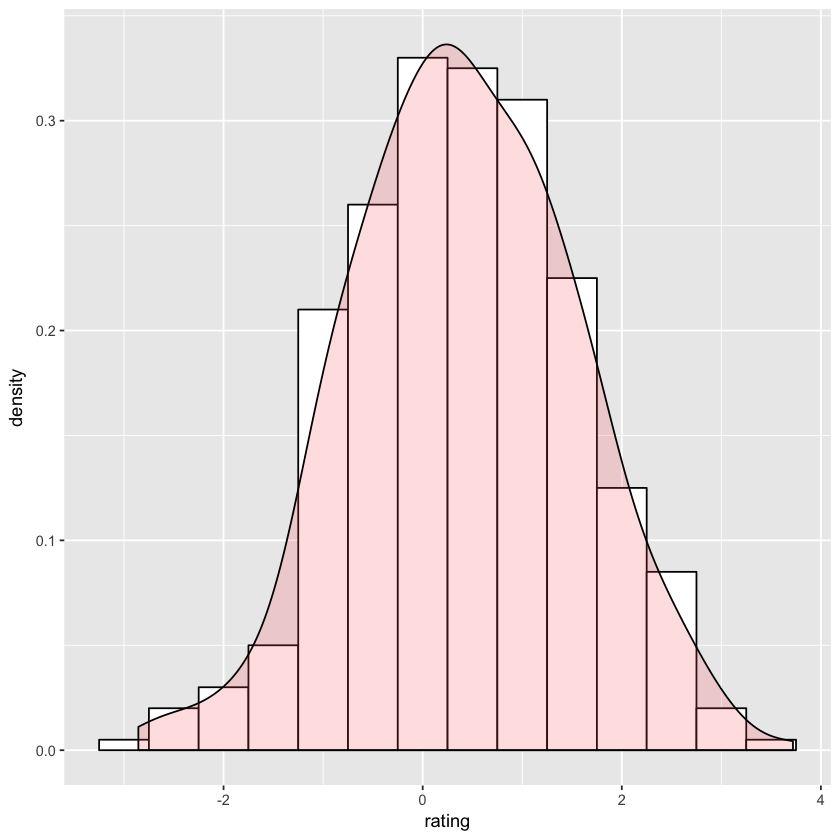

In [91]:
ggplot(dat, aes(x=rating)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   binwidth=.5,
                   colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")  # Overlay with transparent density plot

# Add a line for the mean:

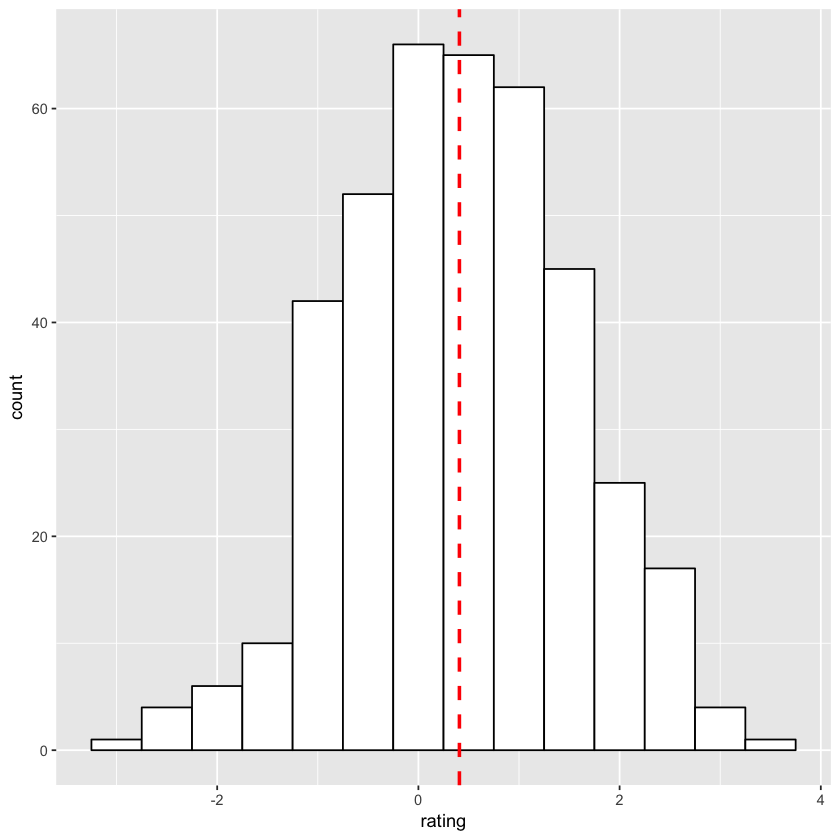

In [93]:
ggplot(dat, aes(x=rating)) +
    geom_histogram(binwidth=.5, colour="black", fill="white") +
    geom_vline(aes(xintercept=mean(rating, na.rm=T)),   # Ignore NA values for mean
               color="red", linetype="dashed", size=1)


# Histogram and density plots with multiple groups

## Overlaid histograms

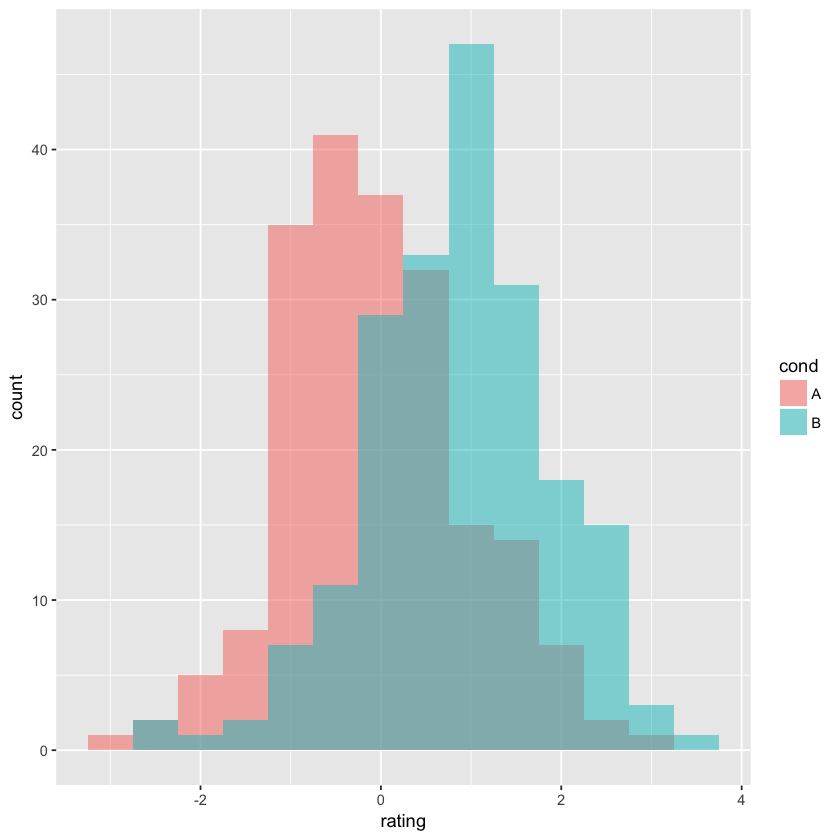

In [94]:
ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity")

## Interleaved histograms

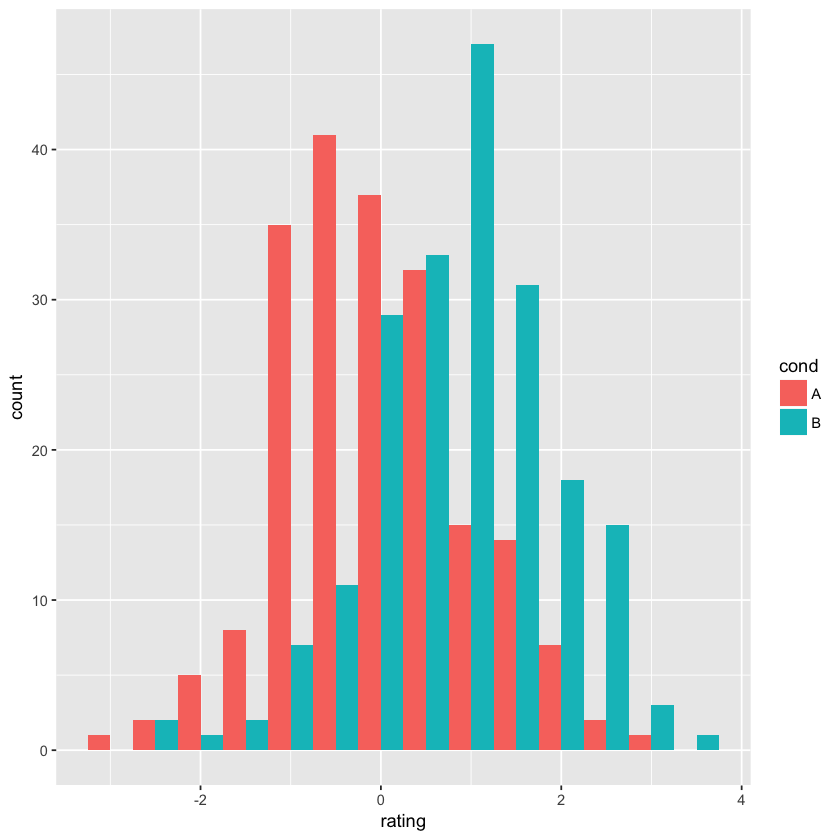

In [95]:
ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(binwidth=.5, position="dodge")

## Density plots

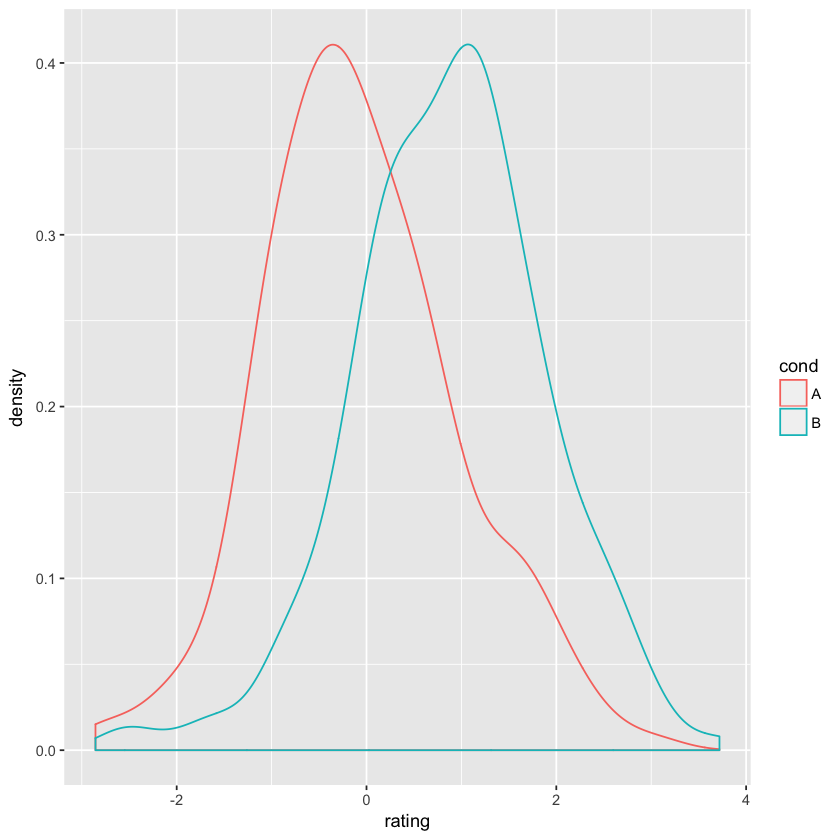

In [96]:
ggplot(dat, aes(x=rating, colour=cond)) + geom_density()

## Density plots with semi-transparent fill

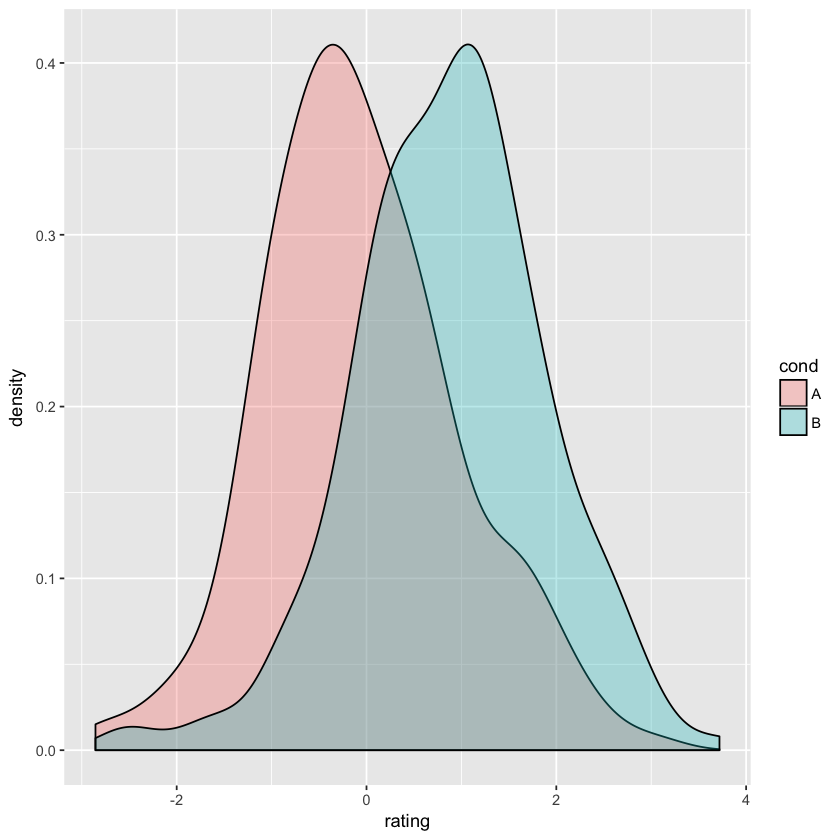

In [97]:
ggplot(dat, aes(x=rating, fill=cond)) + geom_density(alpha=.3)

# Ajouter la moyenne à chacun des groupes,

In [98]:
library(plyr)
cdat <- ddply(dat, "cond", summarise, rating.mean=mean(rating))
cdat

cond rating.mean
1 A    -0.05775928
2 B     0.87324927

## Overlaid histograms with means

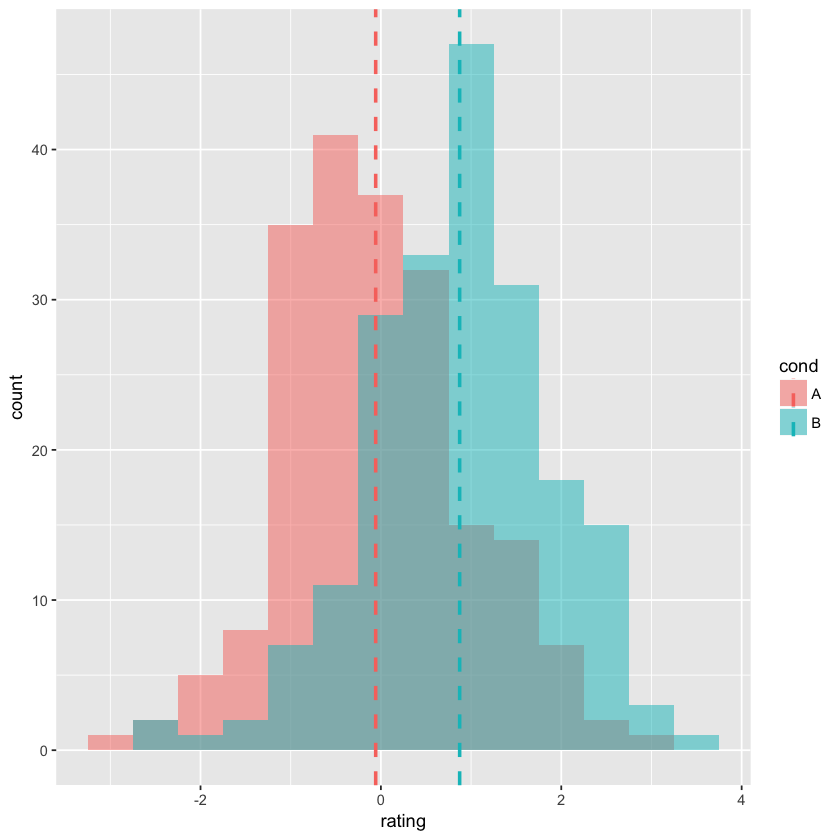

In [99]:
ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity") +
    geom_vline(data=cdat, aes(xintercept=rating.mean,  colour=cond),
               linetype="dashed", size=1)

## Density plots with means

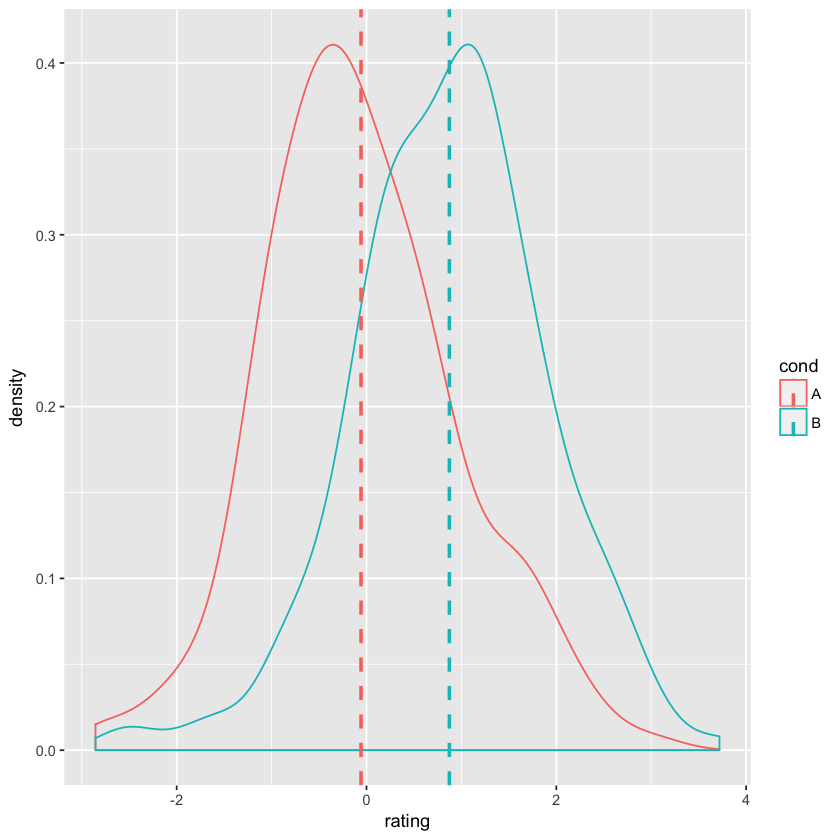

In [100]:
ggplot(dat, aes(x=rating, colour=cond)) +
    geom_density() +
    geom_vline(data=cdat, aes(xintercept=rating.mean,  colour=cond),
               linetype="dashed", size=1)

# Box plots

## A basic box plot

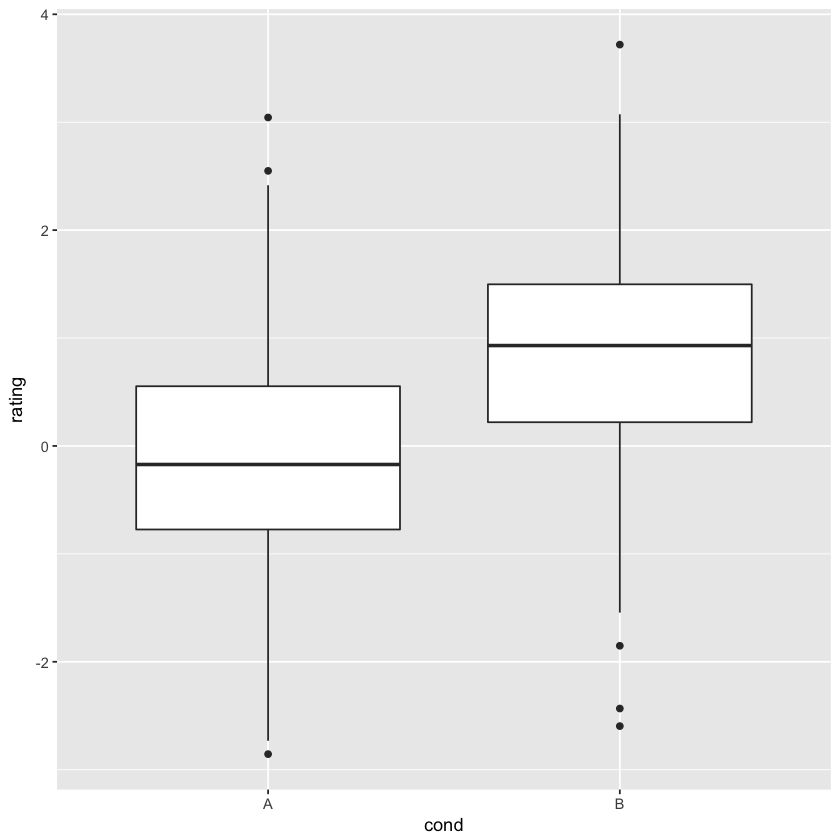

In [101]:
ggplot(dat, aes(x=cond, y=rating)) + geom_boxplot()

## A basic box with the conditions colored

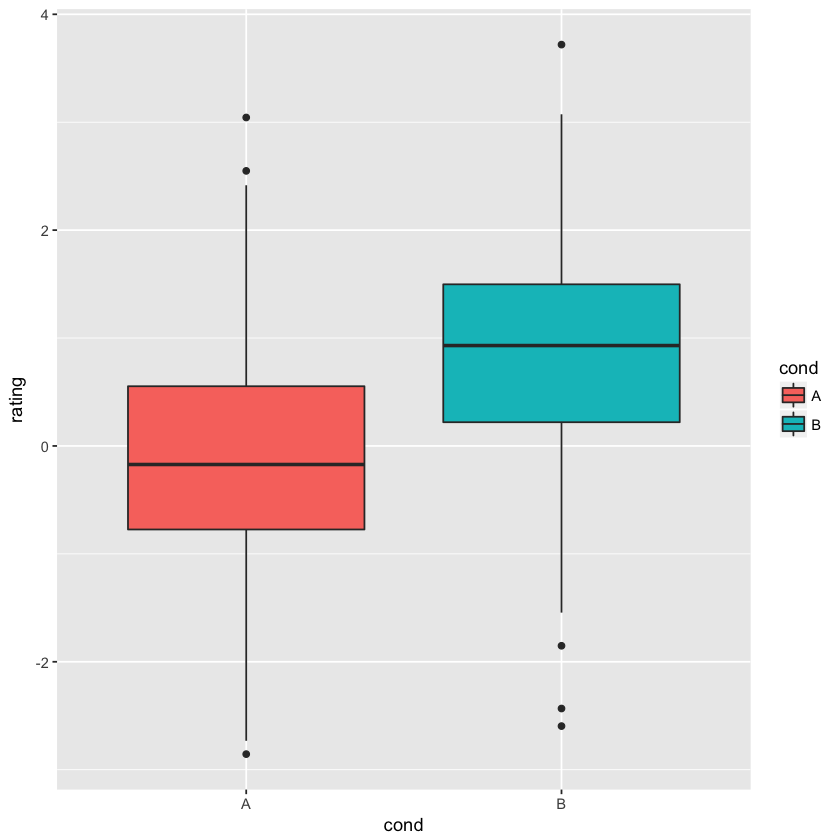

In [102]:
ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot()

## The above adds a redundant legend. With the legend removed:

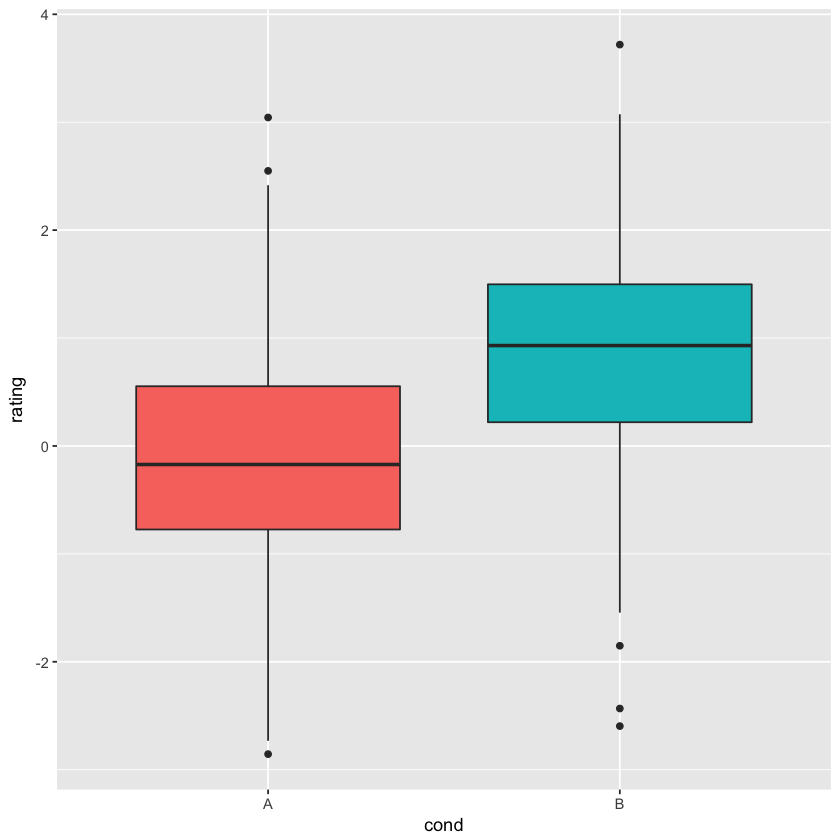

In [103]:
ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot() +
    guides(fill=FALSE)

## With flipped axes

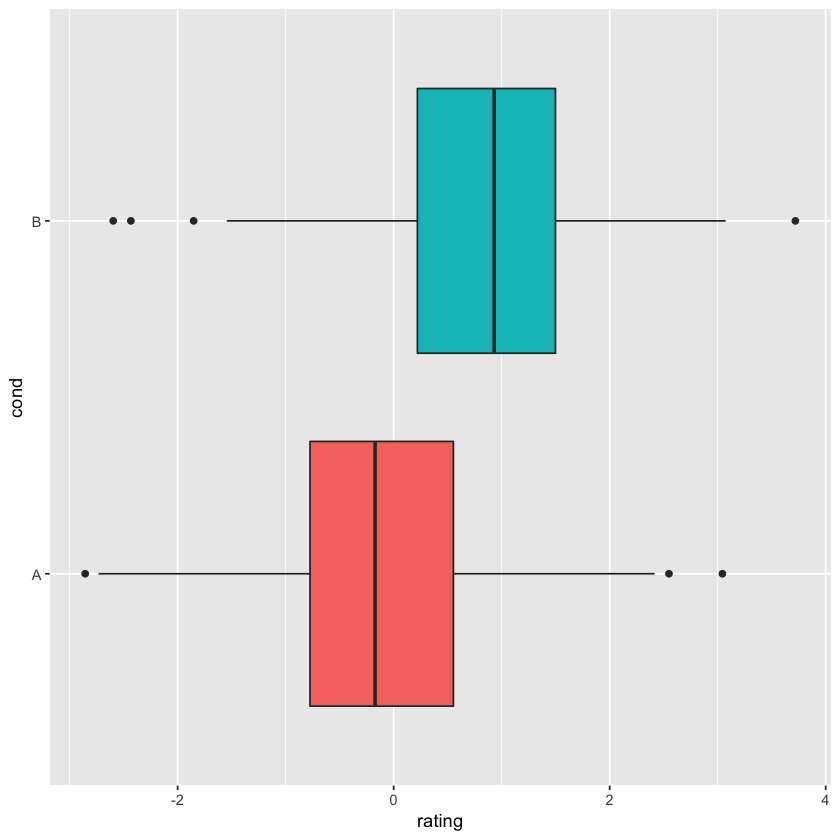

In [104]:
ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot() + 
    guides(fill=FALSE) + coord_flip()

# Corrélation:

In [107]:
df_app <-read.csv("../cours_10/stocks_correlation.csv", header = T)[ ,2:9]
mat_corr<-cor(df_app)

In [110]:
# install.packages("ellipse")

In [111]:
library(ellipse)

In [113]:
mat_corr

DO         AMZN       AAPL       BA         FB         HON       
DO    1.0000000 -0.5991331 -0.5734723 -0.4594365 -0.5740901 -0.5931147
AMZN -0.5991331  1.0000000  0.9491803  0.8523493  0.9373536  0.9481765
AAPL -0.5734723  0.9491803  1.0000000  0.8722640  0.9504718  0.9553516
BA   -0.4594365  0.8523493  0.8722640  1.0000000  0.9606722  0.9450005
FB   -0.5740901  0.9373536  0.9504718  0.9606722  1.0000000  0.9786910
HON  -0.5931147  0.9481765  0.9553516  0.9450005  0.9786910  1.0000000
ITW  -0.4391862  0.9413468  0.8783502  0.8729395  0.8972479  0.9464567
NFLX -0.4808701  0.9313529  0.9275452  0.9550461  0.9762811  0.9539829
     ITW        NFLX      
DO   -0.4391862 -0.4808701
AMZN  0.9413468  0.9313529
AAPL  0.8783502  0.9275452
BA    0.8729395  0.9550461
FB    0.8972479  0.9762811
HON   0.9464567  0.9539829
ITW   1.0000000  0.8993815
NFLX  0.8993815  1.0000000

In [115]:
library(ggplot2)

In [120]:
# install.packages("ggcorrplot")

In [121]:
library(ggcorrplot)

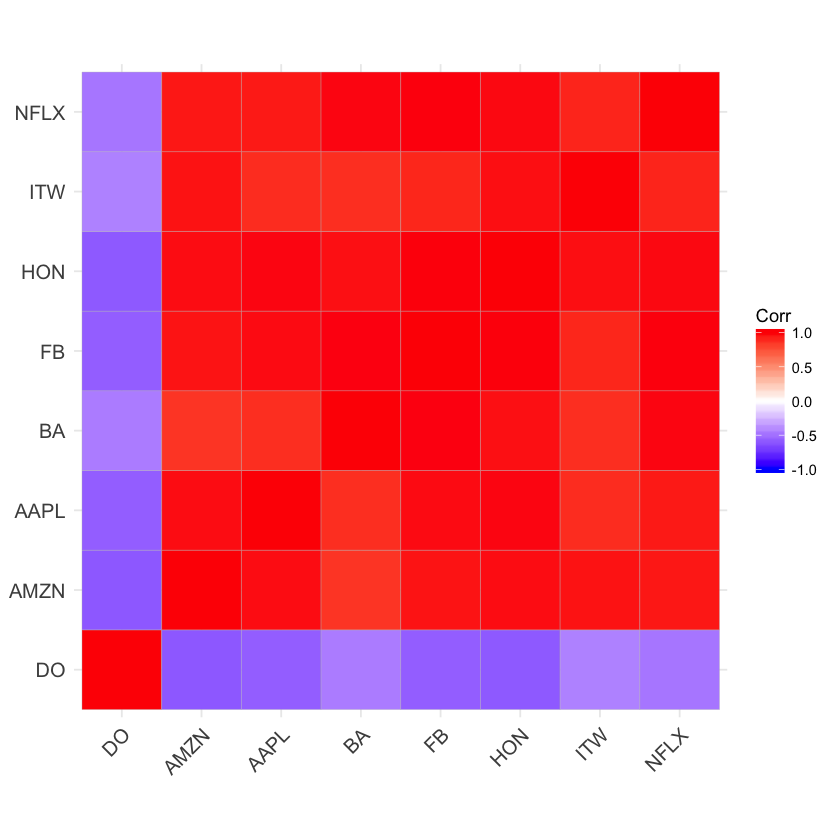

In [122]:
ggcorrplot(mat_corr)

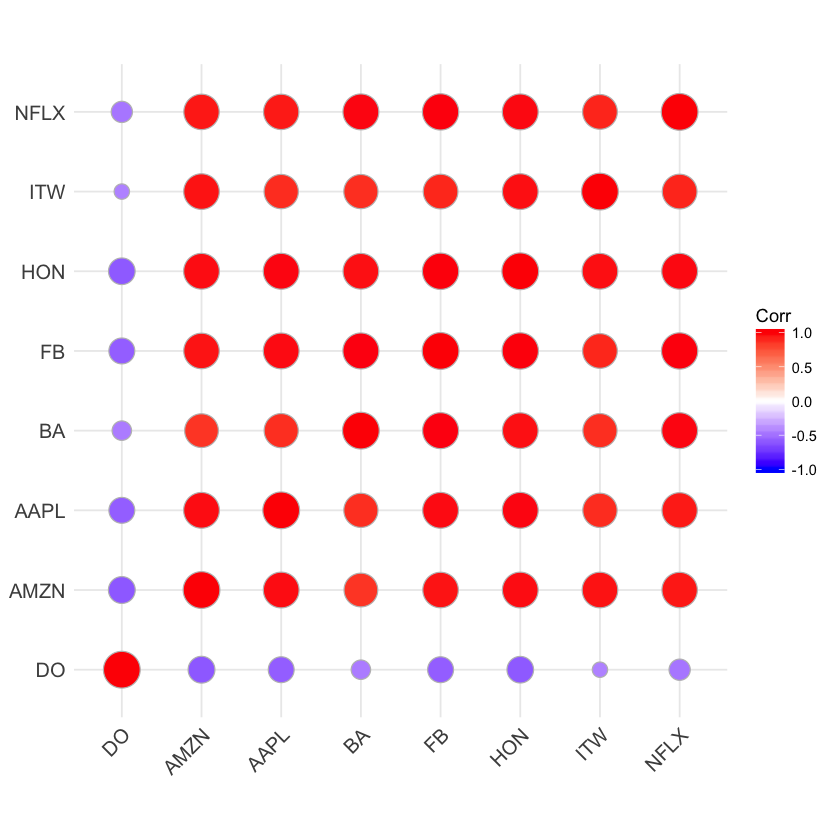

In [124]:
ggcorrplot(mat_corr, method = "circle")

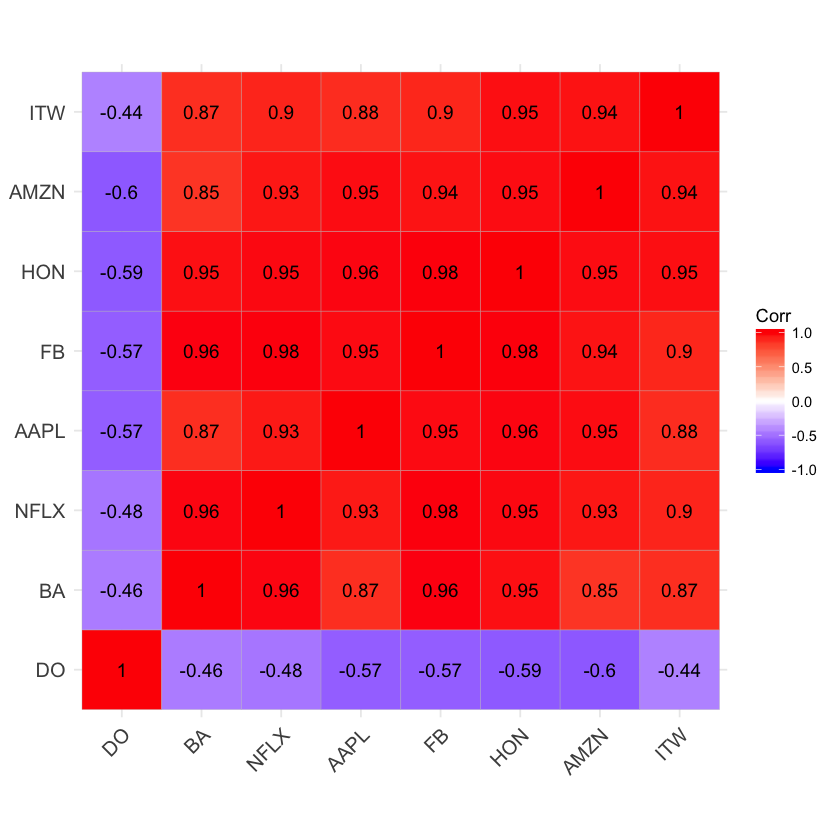

In [126]:
ggcorrplot(mat_corr, hc.order = TRUE,
   lab = TRUE)

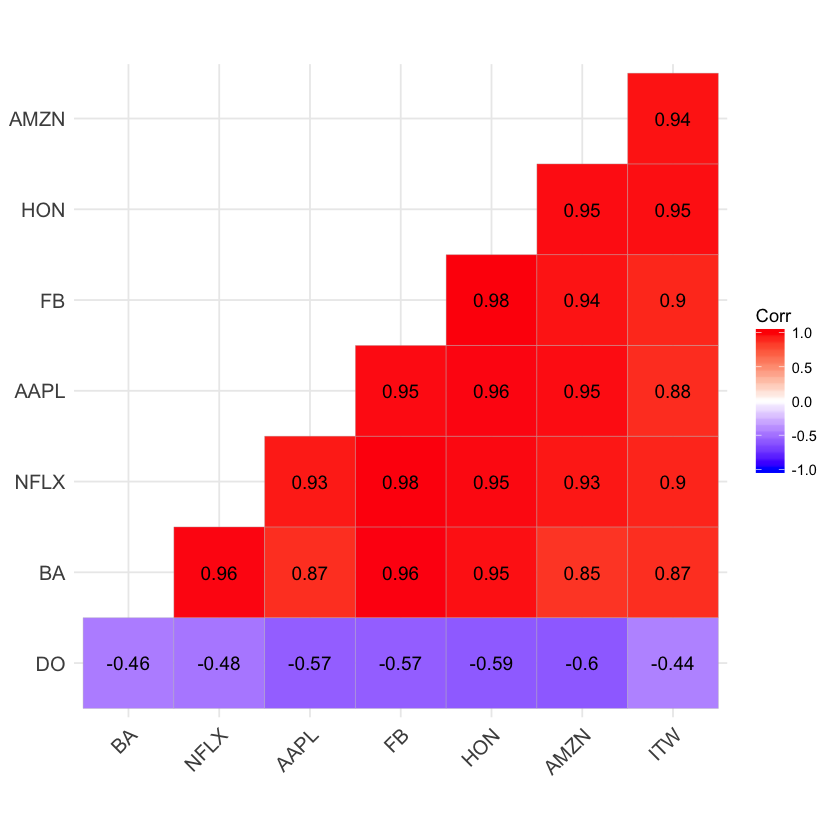

In [128]:
ggcorrplot(mat_corr, hc.order = TRUE, type = "lower",
   lab = TRUE)

In [132]:
data(mtcars)
corr <- round(cor(mtcars), 1)
head(corr[, 1:6])

mpg  cyl  disp hp   drat wt  
mpg   1.0 -0.9 -0.8 -0.8  0.7 -0.9
cyl  -0.9  1.0  0.9  0.8 -0.7  0.8
disp -0.8  0.9  1.0  0.8 -0.7  0.9
hp   -0.8  0.8  0.8  1.0 -0.4  0.7
drat  0.7 -0.7 -0.7 -0.4  1.0 -0.7
wt   -0.9  0.8  0.9  0.7 -0.7  1.0

In [135]:
p.mat <- cor_pmat(mtcars)
p.mat[, 1:4]


mpg          cyl          disp         hp          
mpg  0.000000e+00 6.112687e-10 9.380327e-10 1.787835e-07
cyl  6.112687e-10 0.000000e+00 1.802838e-12 3.477861e-09
disp 9.380327e-10 1.802838e-12 0.000000e+00 7.142679e-08
hp   1.787835e-07 3.477861e-09 7.142679e-08 0.000000e+00
drat 1.776240e-05 8.244636e-06 5.282022e-06 9.988772e-03
wt   1.293959e-10 1.217567e-07 1.222320e-11 4.145827e-05
qsec 1.708199e-02 3.660533e-04 1.314404e-02 5.766253e-06
vs   3.415937e-05 1.843018e-08 5.235012e-06 2.940896e-06
am   2.850207e-04 2.151207e-03 3.662114e-04 1.798309e-01
gear 5.400948e-03 4.173297e-03 9.635921e-04 4.930119e-01
carb 1.084446e-03 1.942340e-03 2.526789e-02 7.827810e-07

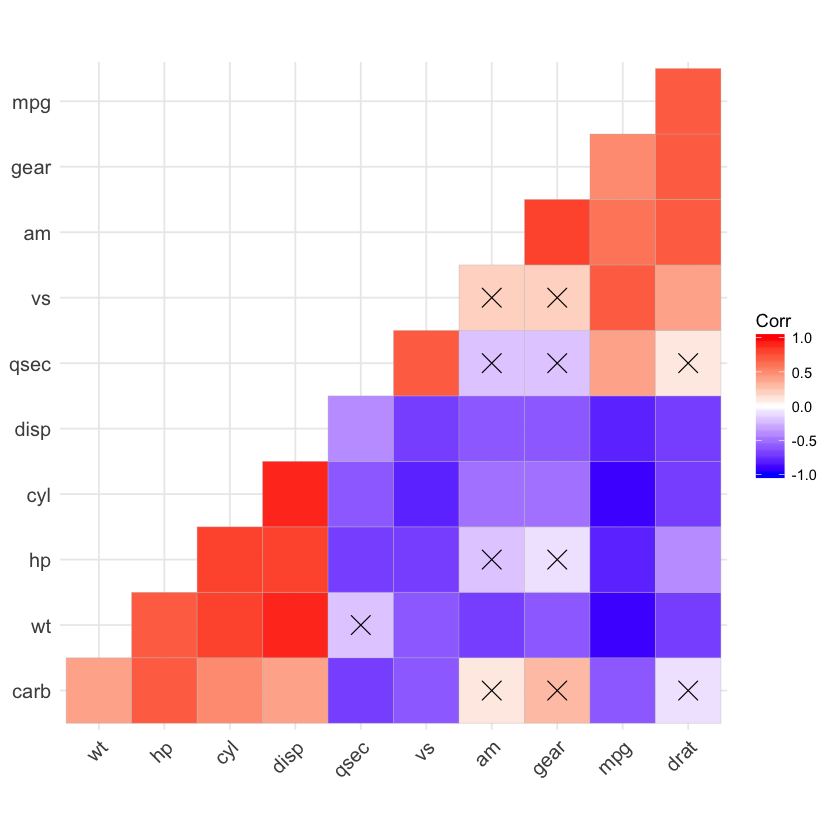

In [134]:
ggcorrplot(corr, hc.order = TRUE,
    type = "lower", p.mat = p.mat)

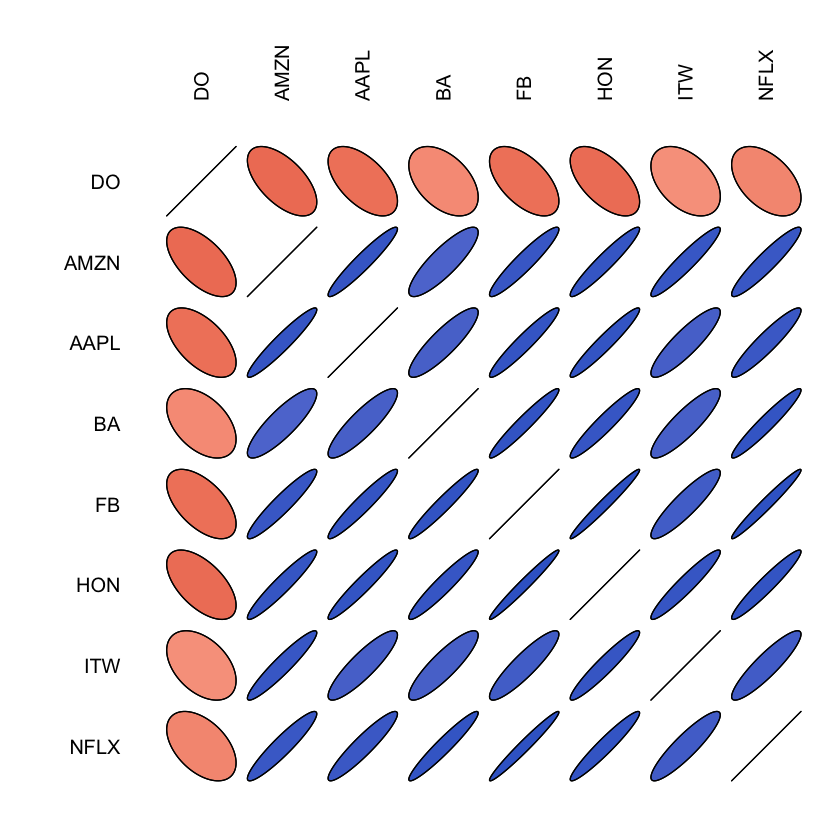

In [140]:
colorfun <- colorRamp(c("#CC0000","white","#3366CC"), space="Lab")
plotcorr(mat_corr, col=rgb(colorfun((mat_corr+1)/2), maxColorValue=255),
         mar = c(0.1, 0.1, 0.1, 0.1))

# ggsave

http://ggplot2.tidyverse.org/reference/ggsave.html

In [141]:
ggsave("mtcars.pdf")

Saving 7 x 7 in image


In [142]:
ggsave("mtcars.png")

Saving 7 x 7 in image


In [143]:
ggsave("mtcars.pdf", width = 4, height = 4)

In [144]:
ggsave("mtcars.pdf", width = 20, height = 20, units = "cm")

# problème

In [7]:
library(ggplot2)
library(dplyr)

In [2]:
insurance <- read.csv("https://raw.githubusercontent.com/nmeraihi/data/master/insurance.csv")
insurance$smoker <- as.factor(insurance$smoker)

In [3]:
head(insurance)

age sex    bmi    children smoker region    charges  
1 19  female 27.900 0        yes    southwest 16884.924
2 18  male   33.770 1        no     southeast  1725.552
3 28  male   33.000 3        no     southeast  4449.462
4 33  male   22.705 0        no     northwest 21984.471
5 32  male   28.880 0        no     northwest  3866.855
6 31  female 25.740 0        no     southeast  3756.622

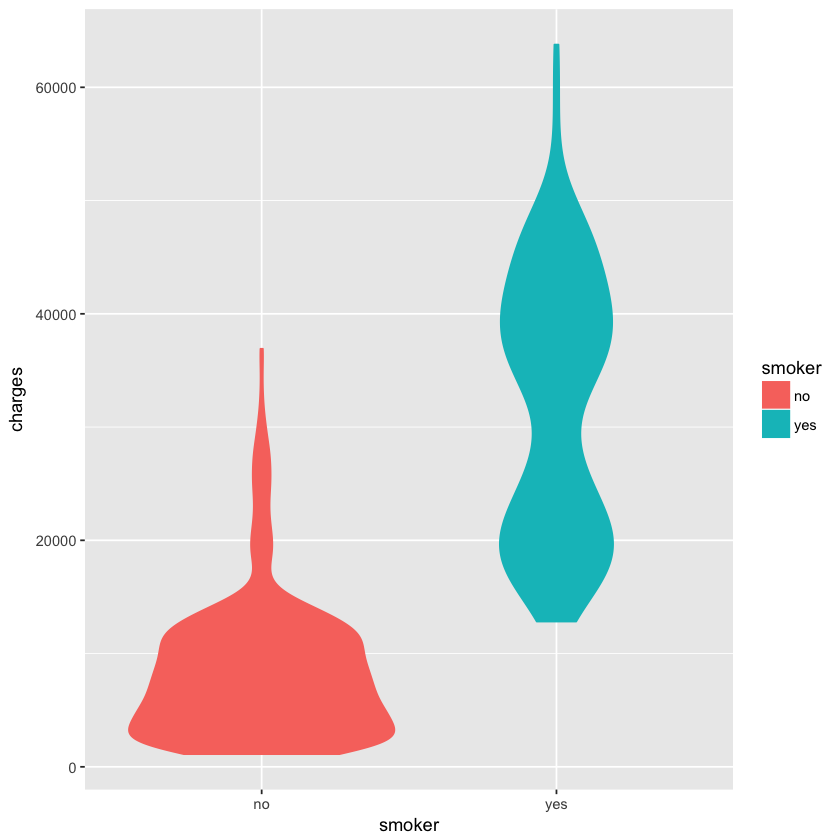

In [8]:
insurance %>% 
  ggplot(aes(x=smoker, y = charges, fill = smoker, colour = smoker)) + 
  geom_violin()

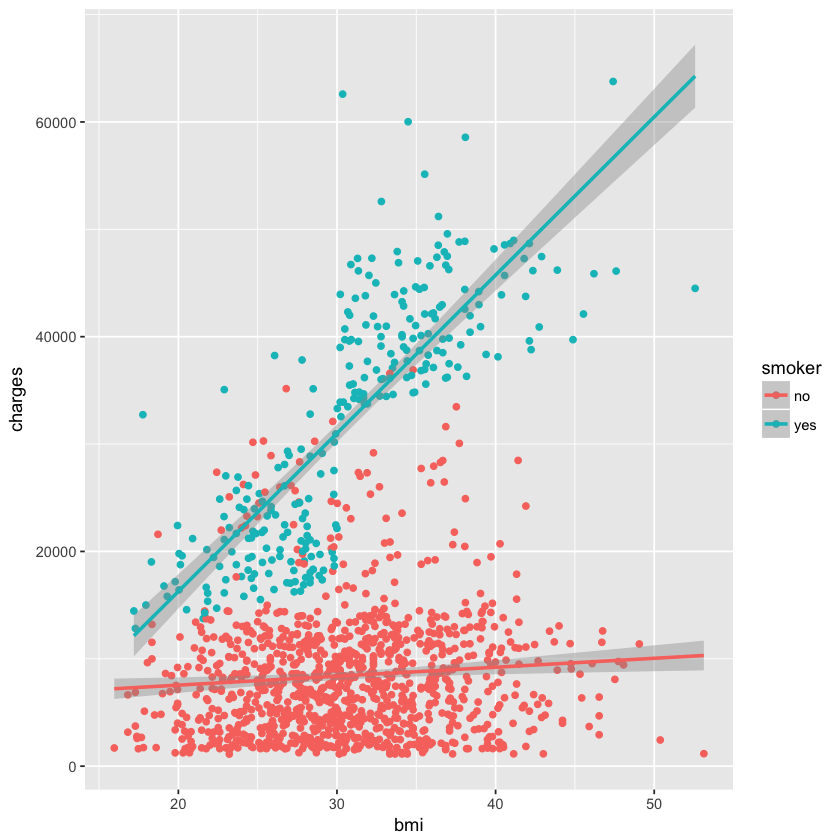

In [9]:
insurance %>% 
  ggplot(aes(x= bmi, y= charges, colour = smoker)) + geom_point() + 
  geom_smooth(method="lm")

## Prédiction

## Prediction of smokers’ health care cost

In [11]:
insurance.smoker <- insurance %>% filter(smoker == "yes")
fit <- lm(charges ~ bmi, data = insurance.smoker)
fit


Call:
lm(formula = charges ~ bmi, data = insurance.smoker)

Coefficients:
(Intercept)          bmi  
     -13187         1473  


In [12]:
x = 30
charge.amount <- 1473*x + -13187
charge.amount

[1] 31003

In [16]:
install.packages("GGally")

also installing the dependencies ‘prettyunits’, ‘progress’, ‘reshape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [19]:
library(GGally)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


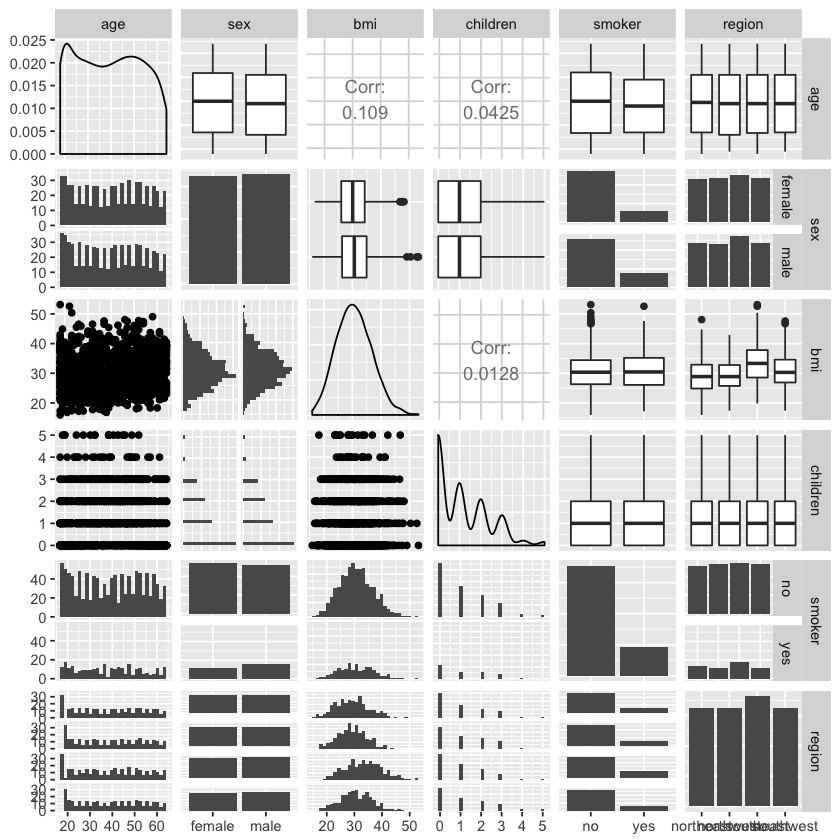

In [21]:
ggpairs(insurance[-7])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

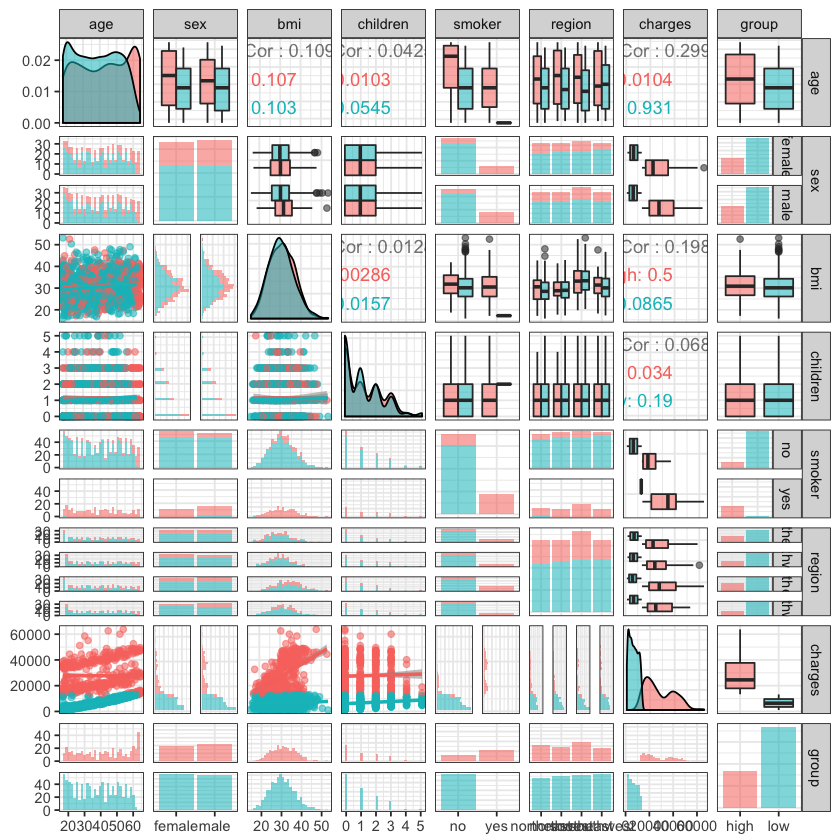

In [25]:
insurance$group <- ifelse(insurance$charges > mean(insurance$charges), "high", "low")
ggpairs(insurance, aes(color=group, alpha=0.75), lower=list(continuous="smooth"))+ theme_bw()